<a href="https://colab.research.google.com/github/PaulinaAragon/ESTADISTICA/blob/main/ei_u5_01_22150580.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemario de bloqueo

##Problema 1:
Se hace un estudio sobre la efectividad de tres marcas de atomizador para matar moscas. Para ello, cada producto se aplica a un grupo de 100 moscas, y se cuenta el número de moscas muertas expresado en porcentajes. Se hicieron seis réplicas, pero en días diferentes; por ello, se sospecha que puede haber algún efecto importante debido a esta fuente de variación. Los datos obtenidos se muestran a continuación:

| Marca de atomizador | Réplica 1 | Réplica 2 | Réplica 3 | Réplica 4 | Réplica 5 | Réplica 6 |
|----------------------|-----------|-----------|-----------|-----------|-----------|-----------|
| 1                   | 72        | 65        | 67        | 75        | 62        | 73        |
| 2                   | 55        | 59        | 68        | 70        | 53        | 50        |
| 3                   | 64        | 74        | 61        | 58        | 51        | 69        |

**Preguntas:**<br>
a) Suponiendo un DBCA (Diseño en Bloques Completamente al Azar), formule las hipótesis adecuadas y el modelo estadístico.  
b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?  
c) ¿Hay algún atomizador mejor? Argumente su respuesta.  
d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.  
e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.


## a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.

**Hipotesis**

H₀: Las medias de efectividad entre marcas son iguales.  
H₁: Al menos una media de efectividad entre marcas es diferente.

Para los bloques:
H₀: No hay efecto significativo de los días (réplicas).  
H₁: Hay efecto significativo de los días (réplicas).


In [252]:
#Diana Paulina Sánchez Aragón
import pandas as pd
from io import StringIO

data = '''
Marca,Replica,Valor
1,1,72
1,2,65
1,3,67
1,4,75
1,5,62
1,6,73
2,1,55
2,2,59
2,3,68
2,4,70
2,5,53
2,6,50
3,1,64
3,2,74
3,3,61
3,4,58
3,5,51
3,6,69
'''

df = pd.read_csv(StringIO(data))
df

,Marca,Replica,Valor
0,1,1,72
1,1,2,65
2,1,3,67
3,1,4,75
4,1,5,62
5,1,6,73
6,2,1,55
7,2,2,59
8,2,3,68
9,2,4,70


In [253]:
#Diana Paulina Sánchez Aragón
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Replica'    # La variable que no me interesa comparar
interes = 'Marca'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
# print(tabla_anova) #

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
tabla_anova

Resultados del ANOVA:

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


,sum_sq,df,F,PR(>F)
C(Marca),296.333333,2.0,2.880752,0.102804
C(Replica),281.333333,5.0,1.093973,0.420718
Residual,514.333333,10.0,NaN,NaN


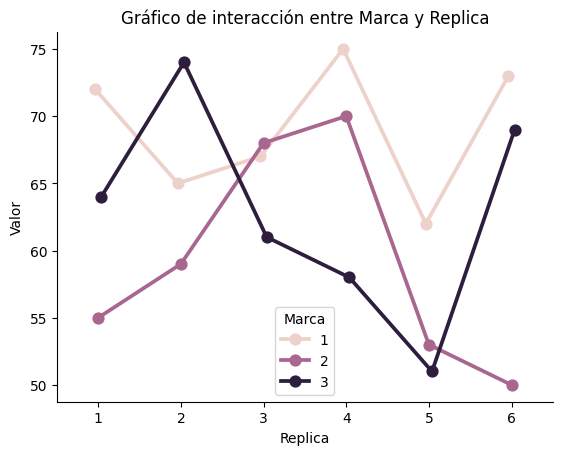

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

## b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?

El estudio empleó un Análisis de Varianza bajo un Diseño en Bloques Completamente al Azar, donde las marcas de atomizador representaron los tratamientos y los días de experimentación actuaron como factores de bloqueo. El p-valor obtenido para el impacto de la marca fue de 0.103. Al ser este valor mayor que el umbral de significancia de 0.05, los datos no proporcionan evidencia estadística suficiente para afirmar que las marcas difieran en su efectividad promedio. En consecuencia, se dictaminó que no hay una diferencia significativa.

## c) ¿Hay algún atomizador mejor? Argumente su respuesta.

A pesar de que se observaron ciertas diferencias en los valores promedio de efectividad entre las marcas (como la tendencia de la Marca 1 a obtener puntuaciones más elevadas), estas discrepancias no alcanzaron un nivel de significancia estadística. Esto nos impide concluir con seguridad que una marca sea intrínsecamente mejor que las otras con los datos disponibles. En consecuencia, la falta de una diferencia estadísticamente significativa entre las marcas nos lleva a determinar que ningún atomizador puede ser clasificado como "el mejor".

## d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.

El análisis de varianza también examinó la influencia del día en cada réplica. Con un p-valor de 0.421, no se encontró evidencia estadísticamente significativa de que los días afectaran la efectividad de los atomizadores. Esto sugiere que la variabilidad diaria no tuvo un impacto considerable en los resultados.

## e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.

In [255]:
#Diana Paulina Sánchez Aragón
# Prueba de Shapiro
from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Marca'] == 1]['Valor'], "Marca 1", nivel_de_significancia)
prueba_shapiro(df[df['Marca'] == 2]['Valor'], "Marca 2", nivel_de_significancia)
prueba_shapiro(df[df['Marca'] == 3]['Valor'], "Marca 3", nivel_de_significancia)



Prueba de Shapiro-Wilk para Marca 1:
Estadístico: 0.9385
Valor p: 0.6471
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Marca 2:
Estadístico: 0.9066
Valor p: 0.4145
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Marca 3:
Estadístico: 0.9947
Valor p: 0.9975
Interpretación: Los datos tienen una distribución normal.


Para verificar el supuesto de normalidad de los residuos, se realizó la prueba de Shapiro-Wilk. Al obtener un p-valor superior a 0.05, los resultados indican que los residuos se ajustan a una distribución normal.

In [256]:
#Diana Paulina Sánchez Aragón
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Marca'] == 1]['Valor'],
    df[df['Marca'] == 2]['Valor'],
    df[df['Marca'] == 3]['Valor'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 2.563987653883703
Valor p: 0.2774834944728171
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


##Problema 2:
En una empresa lechera se tienen varios silos para almacenar leche (cisternas de 60 000 L). Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. Se sospecha que en algunos silos hay problemas, por ello, durante cinco días se decide registrar la temperatura a cierta hora crítica. Obviamente la temperatura de un día a otro es una fuente de variabilidad que podría impactar la variabilidad total.

| Silo | Lunes | Martes | Miércoles | Jueves | Viernes |
|------|-------|--------|-----------|--------|---------|
| A    | 4.0   | 4.0    | 5.0       | 0.5    | 3.0     |
| B    | 5.0   | 6.0    | 2.0       | 4.0    | 4.0     |
| C    | 4.5   | 4.0    | 3.5       | 2.0    | 3.0     |
| D    | 2.5   | 4.0    | 6.5       | 4.5    | 4.0     |
| E    | 4.0   | 4.0    | 3.5       | 2.0    | 4.0     |

**Preguntas:**<br>
a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?  
b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
c) ¿Hay diferencia entre los silos?  
d) ¿La temperatura de un día a otro es diferente?  
e) Revise residuos, ¿hay algún problema evidente?


## a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?
El factor de tratamiento es: Los Silos.

El factor de bloque es: Los Días de la semana.

In [257]:
#Diana Paulina Sánchez Aragón
import pandas as pd
from io import StringIO

data = '''
silo,dia,temperatura
A,Lunes,4.0
A,Martes,4.0
A,Miercoles,5.0
A,Jueves,0.5
A,Viernes,3.0
B,Lunes,5.0
B,Martes,6.0
B,Miercoles,2.0
B,Jueves,4.0
B,Viernes,4.0
C,Lunes,4.5
C,Martes,4.0
C,Miercoles,3.5
C,Jueves,2.0
C,Viernes,3.0
D,Lunes,2.5
D,Martes,4.0
D,Miercoles,6.5
D,Jueves,4.5
D,Viernes,4.0
E,Lunes,4.0
E,Martes,4.0
E,Miercoles,3.5
E,Jueves,2.0
E,Viernes,4.0

'''

df = pd.read_csv(StringIO(data))
df

,silo,dia,temperatura
0,A,Lunes,4.0
1,A,Martes,4.0
2,A,Miercoles,5.0
3,A,Jueves,0.5
4,A,Viernes,3.0
5,B,Lunes,5.0
6,B,Martes,6.0
7,B,Miercoles,2.0
8,B,Jueves,4.0
9,B,Viernes,4.0


## b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.
Hipotesis:

En este experimento busca determinar si la temperatura de conservación de la leche varía entre los distintos silos de almacenamiento, lo cual es clave para la calidad. Para ello, se registró la temperatura de cada silo durante cinco días consecutivos a la misma hora. Adicionalmente, se reconoce que el día de la medición puede influir en los resultados debido a cambios ambientales, por lo que el análisis considerará tanto las diferencias entre silos como la posible fluctuación de temperatura entre los días.

## Modelo Estadístico

In [258]:
#Diana Paulina Sánchez Aragón
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'dia'    # La variable que no me interesa comparar
interes = 'silo'      # La variable que me interesa comparar
respuesta = 'temperatura'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
# print(tabla_anova) #

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
tabla_anova



Resultados del ANOVA:

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


,sum_sq,df,F,PR(>F)
C(silo),4.46,4.0,0.690402,0.609212
C(dia),9.76,4.0,1.510836,0.246022
Residual,25.84,16.0,NaN,NaN


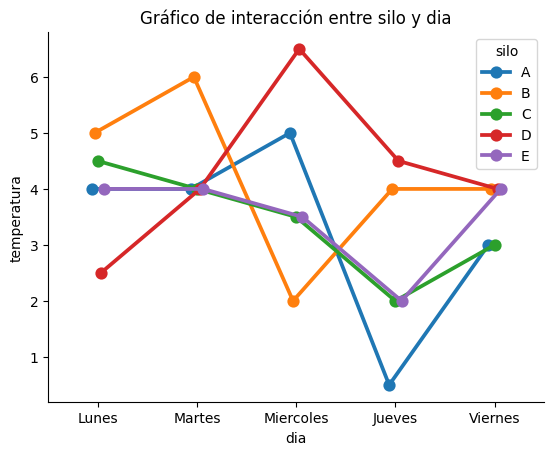

In [259]:
#Diana Paulina Sánchez Aragón
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

## c) ¿Hay diferencia entre los silos?
El p-valor para el efecto del silo, según el análisis de varianza, fue de 0.609. Al ser este mayor que 0.05, no se detectaron diferencias estadísticamente significativas en la temperatura de almacenamiento entre los silos. Concluimos, por ende, que no hay una diferencia significativa.

## d) ¿La temperatura de un día a otro es diferente?
El efecto del día arrojó un p-valor de 0.246. Esto significa que no se encontró evidencia estadísticamente significativa de que la temperatura fluctúe de forma sistemática día a día. Por ende, la variabilidad diaria en la temperatura no se considera una fuente de variación importante en este caso.

## e) Revise residuos, ¿hay algún problema evidente?

In [260]:
#Diana Paulina Sánchez Aragón
# Prueba de Shapiro
from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['silo'] == "A"]['temperatura'], "Silo A", nivel_de_significancia)
prueba_shapiro(df[df['silo'] == "B"]['temperatura'], "Silo B", nivel_de_significancia)
prueba_shapiro(df[df['silo'] == "C"]['temperatura'], "Silo C", nivel_de_significancia)
prueba_shapiro(df[df['silo'] == "D"]['temperatura'], "Silo D", nivel_de_significancia)
prueba_shapiro(df[df['silo'] == "E"]['temperatura'], "Silo E", nivel_de_significancia)


Prueba de Shapiro-Wilk para Silo A:
Estadístico: 0.8854
Valor p: 0.3344
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo B:
Estadístico: 0.9556
Valor p: 0.7773
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo C:
Estadístico: 0.9787
Valor p: 0.9276
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo D:
Estadístico: 0.9306
Valor p: 0.6006
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo E:
Estadístico: 0.7008
Valor p: 0.0098
Interpretación: Los datos no tienen una distribución normal.


In [261]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['silo'] == "A"]['temperatura'],
    df[df['silo'] == "B"]['temperatura'],
    df[df['silo'] == "C"]['temperatura'],
    df[df['silo'] == "D"]['temperatura'],
    df[df['silo'] == "E"]['temperatura'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 2.3581336401556414
Valor p: 0.6702060348913189
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


El modelo es adecuado y se observo que no hay residuos, que se cumple con la normalidad y que no se presenta heterocedasticidad ni de relaciones no lineales no modeladas.

## Problema 3
Se diseñó un experimento para estudiar el rendimiento de cuatro detergentes. Las siguientes lecturas de “blancura” se obtuvieron con un equipo especial diseñado para 12 cargas de lavado, distribuidas en tres modelos de lavadoras:

| Detergente | Lavadora 1 | Lavadora 2 | Lavadora 3 |
|------------|------------|------------|------------|
| A          | 45         | 43         | 51         |
| B          | 47         | 44         | 52         |
| C          | 50         | 49         | 57         |
| D          | 42         | 37         | 49         |

**Preguntas:**<br>
a) Señale el nombre del diseño experimental utilizado.  
b) Formule la hipótesis que se quiere probar en este problema.  
c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.  



## a) Señale el nombre del diseño experimental utilizado.
En este experimento se consideran 4 tipos de detergente como el factor principal y 3 modelos de lavadora como bloques o factor de bloqueo.

El diseño utilizado es un Diseño en Bloques Completos al Azar (DBCA), también conocido como Diseño de Bloques Completos, en el cual los detergentes representan los tratamientos y las lavadoras funcionan como bloques, ya que cada modelo de lavadora incluye una observación correspondiente a cada detergente.

## b) Formule la hipótesis que se quiere probar en este problema.
El experimento parte de la hipótesis de que los cuatro detergentes tienen un rendimiento promedio similar en términos de blancura. El objetivo es comprobar si alguno de ellos ofrece un efecto distinto, indicando diferencias en la calidad del lavado, independientemente del modelo de lavadora.

In [262]:
#Diana Paulina Sánchez Aragón
import pandas as pd
from io import StringIO

data = '''
Detergente,Lavadora,Lectura
A,1,45
A,2,43
A,3,51
B,1,47
B,2,44
B,3,52
C,1,50
C,2,49
C,3,57
D,1,42
D,2,37
D,3,49

'''

df = pd.read_csv(StringIO(data))
df

,Detergente,Lavadora,Lectura
0,A,1,45
1,A,2,43
2,A,3,51
3,B,1,47
4,B,2,44
5,B,3,52
6,C,1,50
7,C,2,49
8,C,3,57
9,D,1,42


In [263]:
#Diana Paulina Sánchez Aragón
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Lavadora'    # La variable que no me interesa comparar
interes = 'Detergente'      # La variable que me interesa comparar
respuesta = 'Lectura'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
# print(tabla_anova) #

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
tabla_anova

Resultados del ANOVA:

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


,sum_sq,df,F,PR(>F)
C(Detergente),133.666667,3.0,34.127660,0.000363
C(Lavadora),170.166667,2.0,65.170213,0.000085
Residual,7.833333,6.0,NaN,NaN


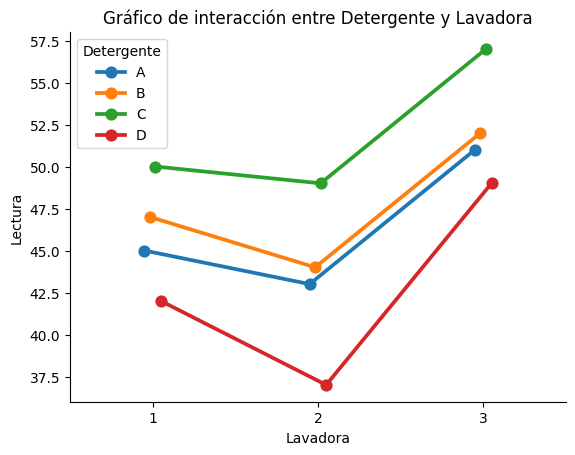

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   1.3333 0.9847 -11.0002 13.6669  False
     A      C   5.6667  0.495  -6.6669 18.0002  False
     A      D  -3.6667  0.779 -16.0002  8.6669  False
     B      C   4.3333 0.6855  -8.0002 16.6669  False
     B      D     -5.0 0.5887 -17.3336  7.3336  False
     C      D  -9.3333 0.1495 -21.6669  3.0002  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

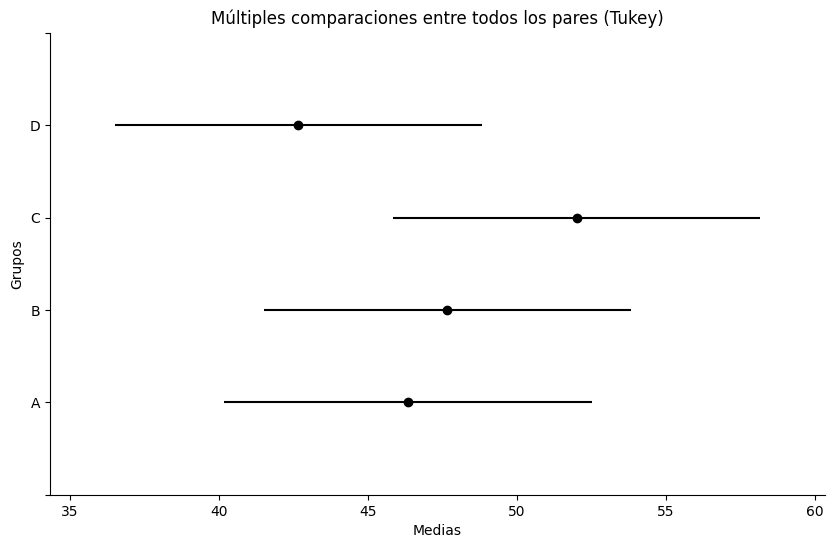

In [265]:
#Diana Paulina Sánchez Aragón
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Lectura'], groups=df['Detergente'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [266]:
#Diana Paulina Sánchez Aragón
# Prueba de Shapiro
from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Detergente'] == "A"]['Lectura'], "Detergente A", nivel_de_significancia)
prueba_shapiro(df[df['Detergente'] == "B"]['Lectura'], "Detergente B", nivel_de_significancia)
prueba_shapiro(df[df['Detergente'] == "C"]['Lectura'], "Detergente C", nivel_de_significancia)
prueba_shapiro(df[df['Detergente'] == "D"]['Lectura'], "Detergente D", nivel_de_significancia)



Prueba de Shapiro-Wilk para Detergente A:
Estadístico: 0.9231
Valor p: 0.4633
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Detergente B:
Estadístico: 0.9796
Valor p: 0.7262
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Detergente C:
Estadístico: 0.8421
Valor p: 0.2196
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Detergente D:
Estadístico: 0.9908
Valor p: 0.8168
Interpretación: Los datos tienen una distribución normal.


In [267]:
#Diana Paulina Sánchez Aragón
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Detergente'] == "A"]['Lectura'],
    df[df['Detergente'] == "B"]['Lectura'],
    df[df['Detergente'] == "C"]['Lectura'],
    df[df['Detergente'] == "D"]['Lectura'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 2.766766945554789
Valor p: 0.4289999281632636
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Conclusiones:
Los resultados del análisis estadístico indican que tanto el tipo de detergente como el modelo de lavadora influyen significativamente en el nivel de blancura obtenido. Al menos un detergente muestra un desempeño diferente, por lo que se recomienda un análisis comparativo entre ellos para identificar cuál ofrece mejores resultados.

## Problema 4
Con respecto al problema anterior:<br>
a) Conteste los tres incisos del problema anterior sin tomar en cuenta el efecto de las lavadoras y obtenga conclusiones.  
b) ¿Hay diferencias en las conclusiones anteriores y las del problema anterior? Explique su respuesta.  
c) ¿Con cuáles conclusiones se queda? Explique su respuesta.

## a) Conteste los tres incisos del problema anterior sin tomar en cuenta el efecto de las lavadoras y obtenga conclusiones.
a) Señale el nombre del diseño experimental utilizado.

Diseño experimental: Al excluir las lavadoras, el experimento se interpreta como un Diseño Completamente al Azar (DCA), considerando solo el tipo de detergente como factor.

## b) Formule la hipótesis que se quiere probar en este problema.
Se parte de la suposición de que los cuatro detergentes tienen un rendimiento promedio similar en blancura, y que cualquier diferencia se debe al azar, al no considerar el modelo de lavadora. El objetivo es evaluar si el tipo de detergente, por sí solo, influye significativamente en el nivel de blancura obtenido.

## c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.

In [268]:
#Diana Paulina Sánchez Aragón
import pandas as pd
from io import StringIO
data = '''
Detergente,Blancura
A,45
A,43
A,51
B,47
B,44
B,52
C,50
C,49
C,57
D,42
D,37
D,49
'''
df = pd.read_csv(StringIO(data))
df

,Detergente,Blancura
0,A,45
1,A,43
2,A,51
3,B,47
4,B,44
5,B,52
6,C,50
7,C,49
8,C,57
9,D,42


In [269]:
#Diana Paulina Sánchez Aragón
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

interes = 'Detergente'      # La variable que me interesa comparar
respuesta = 'Blancura' # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")


Resultados del ANOVA:
                   sum_sq   df         F   PR(>F)
C(Detergente)  133.666667  3.0  2.002497  0.19229
Residual       178.000000  8.0       NaN      NaN

Conclusión: No hay diferencias significativas entre los tratamientos.


## Conclusiones

El ANOVA realizado bajo un diseño completamente al azar, considerando solo el tipo de detergente, arrojó un valor de F = 2.00 y un valor p = 0.1923. Como este valor p es mayor a 0.05, no se encontraron diferencias significativas entre los detergentes. Por lo tanto, se concluye que, bajo este enfoque, todos los detergentes presentan una efectividad similar en blancura, y las variaciones observadas pueden atribuirse al azar.

## b) ¿Hay diferencias en las conclusiones anteriores y las del problema anterior? Explique su respuesta.
Las conclusiones varían según se considere o no el efecto de las lavadoras. Al incluirlas como bloques, se detectan diferencias significativas entre los detergentes, indicando que al menos uno tiene un rendimiento distinto. Sin embargo, al ignorar este factor, no se observan diferencias, ya que la variabilidad entre lavadoras se incorpora al error, disminuyendo la sensibilidad del análisis. Esto demuestra la importancia de controlar el efecto del modelo de lavadora.
## c) ¿Con cuáles conclusiones se queda? Explique su respuesta.
Prefiero las conclusiones del diseño en bloques (DBCA), ya que al considerar el modelo de lavadora como fuente de variación, el análisis resulta más preciso y representativo. Ignorar este factor incrementa el error y puede ocultar diferencias reales entre los detergentes. Por ello, el enfoque con bloques ofrece resultados más confiables.

## Problema 5
Una de las variables críticas en el proceso de ensamble del brazo lector de un disco duro es el ángulo que este forma con el cuerpo principal de la cabeza lectora. Se corre un experimento con el objetivo de comparar dos equipos que miden dicho ángulo en unidades de radianes. Se decide utilizar como factor de bloque a los operadores de los equipos. Los resultados se muestran en la siguiente tabla:

| Operador | Equipo 1                                         | Equipo 2                                         |
|----------|--------------------------------------------------|--------------------------------------------------|
| 1        | 1.328, 0.985, 1.316, 1.553, 1.310               | 1.273, 0.985, 1.134, 1.412, 0.917               |
|          | 1.113, 1.057, 1.144, 1.485, 1.386               | 0.789, 0.671, 0.554, 1.386, 1.289               |
| 2        | 1.269, 1.268, 1.091, 1.195, 1.380               | 1.036, 0.783, 1.108, 1.129, 1.132               |
|          | 1.093, 0.984, 1.087, 1.482, 1.442               | 0.201, 0.900, 0.916, 1.434, 1.223               |
| 3        | 1.440, 1.079, 1.389, 1.611, 1.445               | 1.454, 1.063, 1.219, 1.602, 1.583               |
|          | 1.150, 1.190, 1.247, 1.617, 1.574               | 1.018, 1.050, 0.997, 1.538, 1.478               |

### Preguntas y ejercicios:
a) Plantee el modelo y las hipótesis más adecuadas al problema.  
b) ¿Existen diferencias entre los equipos? Argumente estadísticamente.  
c) ¿Existen diferencias entre los operadores?  
d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores, después interprételas.  
e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.


## a) Plantee el modelo y las hipótesis más adecuadas al problema.
Modelo estadístico: Al comparar dos equipos como factor principal y considerar a los operadores como bloques, se aplica un Diseño en Bloques Completamente al Azar (DBCA), con ambos factores (equipo y operador) tratados como fijos.
## Hipotesis
El experimento compara dos equipos que miden un ángulo crítico, considerando a los operadores como bloque para controlar su influencia. Se busca determinar si las diferencias en las mediciones se deben al equipo o a la variabilidad entre operadores, evaluando así la precisión de ambos factores.

## b) ¿Existen diferencias entre los equipos? Argumente estadísticamente.

In [270]:
#Diana Paulina Sánchez Aragón
import pandas as pd
from io import StringIO
data = '''
Equipo,Operador,Medicion
1,1,1.328
1,1,0.985
1,1,1.316
1,1,1.553
1,1,1.310
1,1,1.113
1,1,1.057
1,1,1.144
1,1,1.485
1,1,1.386
1,2,1.269
1,2,1.268
1,2,1.091
1,2,1.195
1,2,1.380
1,2,1.036
1,2,0.783
1,2,1.108
1,2,1.129
1,2,1.132
1,3,1.440
1,3,1.079
1,3,1.389
1,3,1.611
1,3,1.445
1,3,1.150
1,3,1.190
1,3,1.247
1,3,1.617
1,3,1.574
2,1,1.273
2,1,0.985
2,1,1.134
2,1,1.412
2,1,0.917
2,1,0.789
2,1,0.671
2,1,0.554
2,1,1.386
2,1,1.289
2,2,1.036
2,2,0.783
2,2,1.108
2,2,1.129
2,2,1.132
2,2,0.201
2,2,0.900
2,2,0.916
2,2,1.434
2,2,1.223
2,3,1.454
2,3,1.063
2,3,1.219
2,3,1.602
2,3,1.583
2,3,1.018
2,3,1.050
2,3,0.997
2,3,1.538
2,3,1.478
'''
df = pd.read_csv(StringIO(data))
df

,Equipo,Operador,Medicion
0,1,1,1.328
1,1,1,0.985
2,1,1,1.316
3,1,1,1.553
4,1,1,1.310
5,1,1,1.113
6,1,1,1.057
7,1,1,1.144
8,1,1,1.485
9,1,1,1.386


In [271]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Operador'    # La variable que no me interesa comparar
interes = 'Equipo'      # La variable que me interesa comparar
respuesta = 'Medicion'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
# print(tabla_anova) #

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
tabla_anova

Resultados del ANOVA:

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


,sum_sq,df,F,PR(>F)
C(Equipo),0.342922,1.0,5.711701,0.020242
C(Operador),0.781471,2.0,6.508092,0.002875
Residual,3.362153,56.0,NaN,NaN


In [272]:
#Diana Paulina Sánchez Aragón
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Operador'    # La variable que no me interesa comparar
interes = 'Equipo'      # La variable que me interesa comparar
respuesta = 'Medicion' # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
               sum_sq    df         F    PR(>F)
C(Equipo)    0.342922   1.0  5.711701  0.020242
C(Operador)  0.781471   2.0  6.508092  0.002875
Residual     3.362153  56.0       NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


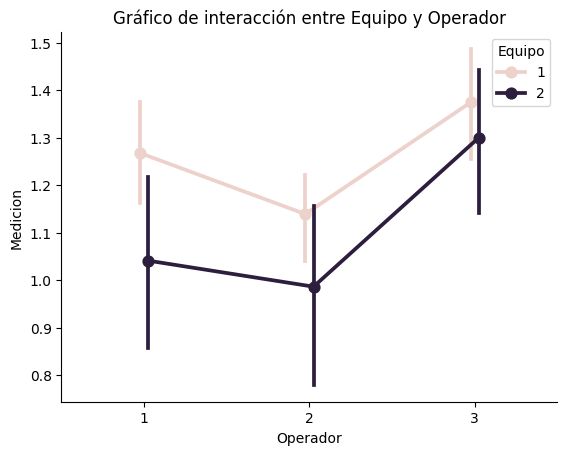

In [273]:
#Diana Paulina Sánchez Aragón
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

## Argumento Estadistico
El análisis de varianza indica que tanto el equipo como el operador influyen significativamente en la medición del ángulo crítico. El valor p = 0.0202 para el equipo muestra que hay diferencias estadísticas entre ellos, posiblemente por calibración o tecnología. El p = 0.0029 para el operador revela que también hay variación según quién realiza la medición, lo cual justifica su control como factor de bloqueo.

En conjunto, se concluye que ambos factores afectan la precisión del proceso. Se recomienda calibrar y mantener los equipos, además de capacitar a los operadores y estandarizar los procedimientos, para reducir la variabilidad y mejorar la calidad en el ensamblado del brazo lector.

## c) ¿Existen diferencias entre los operadores?
El ANOVA muestra un valor F = 6.51 y p = 0.0029 para el factor Operador, indicando diferencias significativas entre ellos. Esto sugiere que los operadores no son intercambiables, ya que su técnica, experiencia o forma de interpretar las mediciones puede influir en los resultados.

## d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores, después interprételas.

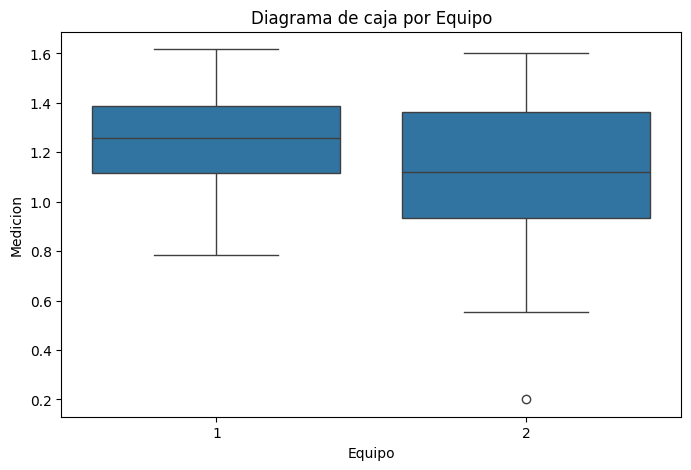

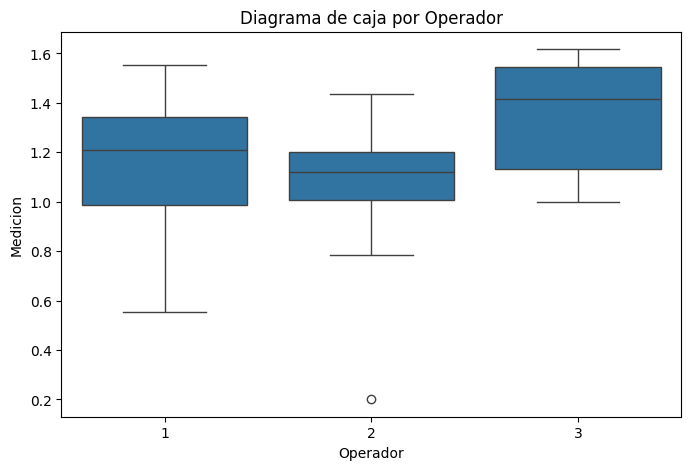

In [274]:
#Diana Paulina Sánchez Araón
import seaborn as sns
import matplotlib.pyplot as plt

# Diagrama de caja por equipo
plt.figure(figsize=(8,5))
sns.boxplot(x='Equipo', y='Medicion', data=df)
plt.title('Diagrama de caja por Equipo')
plt.show()

# Diagrama de caja por operador
plt.figure(figsize=(8,5))
sns.boxplot(x='Operador', y='Medicion', data=df)
plt.title('Diagrama de caja por Operador')
plt.show()

<ipython-input-275-26a28238fa56>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Equipo', y='Medicion', data=df, capsize=0.1, ci='sd', join=False)
<ipython-input-275-26a28238fa56>:4: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='Equipo', y='Medicion', data=df, capsize=0.1, ci='sd', join=False)


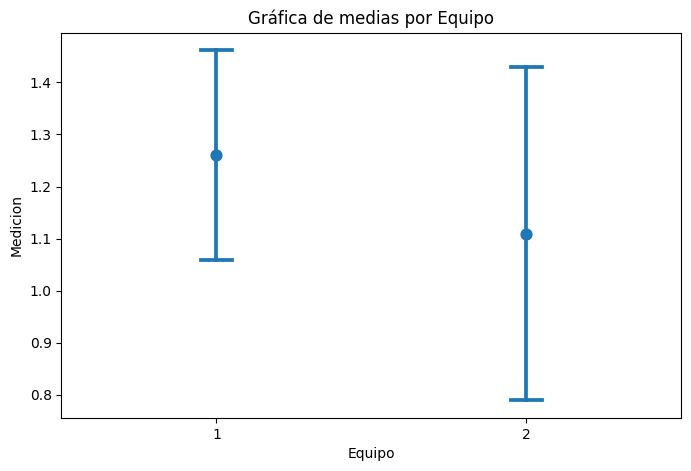

<ipython-input-275-26a28238fa56>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Operador', y='Medicion', data=df, capsize=0.1, ci="sd", join=False)
<ipython-input-275-26a28238fa56>:10: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='Operador', y='Medicion', data=df, capsize=0.1, ci="sd", join=False)


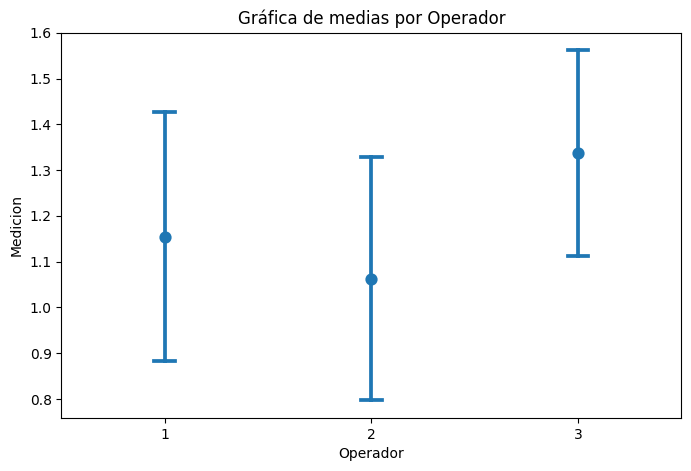

In [275]:
#Diana Paulina Sánchez Aragón
# Gráfica de medias por equipo
plt.figure(figsize=(8,5))
sns.pointplot(x='Equipo', y='Medicion', data=df, capsize=0.1, ci='sd', join=False)
plt.title('Gráfica de medias por Equipo')
plt.show()

# Gráfica de medias por operador
plt.figure(figsize=(8,5))
sns.pointplot(x='Operador', y='Medicion', data=df, capsize=0.1, ci="sd", join=False)
plt.title('Gráfica de medias por Operador')
plt.show()


## e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.

In [276]:
#Diana Paulina Sánchez Aragón
# Prueba de Shapiro
from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Equipo'] == 1]['Medicion'], "Equipo 1", nivel_de_significancia)
prueba_shapiro(df[df['Equipo'] == 2]['Medicion'], "Equipo 2", nivel_de_significancia)


Prueba de Shapiro-Wilk para Equipo 1:
Estadístico: 0.9726
Valor p: 0.6111
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Equipo 2:
Estadístico: 0.9602
Valor p: 0.3129
Interpretación: Los datos tienen una distribución normal.


In [277]:
#Diana Paulina Sánchez Aragón
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Equipo'] == 1]['Medicion'],
    df[df['Equipo'] == 2]['Medicion'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 5.861857628615241
Valor p: 0.015472455921016526
Rechazamos la hipótesis nula: Las varianzas no son iguales.


## Problema 6
Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. De manera tradicional se han usado termómetros de mercurio (Mer) para verificar que la temperatura sea la adecuada, pero ahora se han comprado termómetros electrónicos (Rtd) para facilitar el proceso de medición. Sin embargo, se duda de las mediciones de estos nuevos dispositivos. Para aclarar dudas y diagnosticar la situación, durante cinco días se toman mediciones con ambos tipos de termómetros en varios silos (a la misma hora). Los datos para cinco silos se muestran a continuación:

| Silo | Día 1 (Mer) | Día 1 (Rtd) | Día 2 (Mer) | Día 2 (Rtd) | Día 3 (Mer) | Día 3 (Rtd) | Día 4 (Mer) | Día 4 (Rtd) | Día 5 (Mer) | Día 5 (Rtd) |
|------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|--|
| A    | 4.0         | 2.6         | 4.0         | 2.8         | 5.0         | 5.0         | 0.5         | 0.0         | 3.0         | 2.4         |
| B    | 5.0         | 6.4         | 6.0         | 6.4         | 2.0         | 2.3         | 4.0         | 4.2         | 4.0         | 4.0         |
| C    | 4.5         | 3.3         | 4.0         | 1.4         | 3.5         | 1.8         | 2.0         | -1.9        | 3.0         | -7.6        |
| D    | 2.5         | 3.1         | 4.0         | 5.0         | 6.5         | 6.6         | 4.5         | 2.7         | 4.0         | 4.0         |
| E    | 4.0         | 0.0         | 4.0         | 3.5         | 0.6         | 2.0         | -4.0        | -4.0        | -4.0        | -6.3        |

**Preguntas:**<br>
a) Observe los datos y establezca una conjetura acerca de la confiabilidad de las mediciones con Rtd (del termómetro de mercurio no hay duda).  
b) Es claro que el silo se puede ver como tratamiento y día como bloque. Considere sólo los datos de Rtd y establezca el modelo estadístico. También haga el ANOVA correspondiente y obtenga conclusiones.  
c) Repita el inciso anterior pero ahora para las mediciones Mer.  
d) ¿Las conclusiones obtenidas en los incisos anteriores coinciden? Comente su respuesta.  
e) Datos pareados. Para comparar los dos métodos de medición (Mer y Rtd) obtenga como variable de respuesta la diferencia de temperatura que registran los métodos para cada día en cada silo. Considerando esto, establezca el modelo estadístico, haga el ANOVA correspondiente y obtenga conclusiones.


## a) Observe los datos y establezca una conjetura acerca de la confiabilidad de las mediciones con Rtd (del termómetro de mercurio no hay duda).
Al comparar con los de mercurio, las mediciones de los termómetros electrónicos muestran alta variabilidad y valores poco realistas, lo que sugiere posible descalibración o falta de confiabilidad en estos dispositivos.
## b) Es claro que el silo se puede ver como tratamiento y día como bloque. Considere sólo los datos de Rtd y establezca el modelo estadístico. También haga el ANOVA correspondiente y obtenga conclusiones.
## Modelo Estadistico

In [278]:
#Diana Paulina Sánchez Aragón
import pandas as pd
from io import StringIO

data = '''
Silo,Dia,Valor
A,Día 1,2.6
A,Día 2,2.8
A,Día 3,5.0
A,Día 4,0.0
A,Día 5,2.4
B,Día 1,6.4
B,Día 2,6.4
B,Día 3,2.3
B,Día 4,4.2
B,Día 5,4.0
C,Día 1,3.3
C,Día 2,1.4
C,Día 3,1.8
C,Día 4,-1.9
C,Día 5,-7.6
D,Día 1,3.1
D,Día 2,5.0
D,Día 3,6.6
D,Día 4,2.7
D,Día 5,4.0
E,Día 1,0.0
E,Día 2,3.5
E,Día 3,2.0
E,Día 4,-4.0
E,Día 5,-6.3
'''
df = pd.read_csv(StringIO(data))
df

,Silo,Dia,Valor
0,A,Día 1,2.6
1,A,Día 2,2.8
2,A,Día 3,5.0
3,A,Día 4,0.0
4,A,Día 5,2.4
5,B,Día 1,6.4
6,B,Día 2,6.4
7,B,Día 3,2.3
8,B,Día 4,4.2
9,B,Día 5,4.0


In [279]:
#Diana Paulina Sánchez Aragón
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Dia'    # La variable que no me interesa comparar
interes = 'Silo'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
            sum_sq    df         F    PR(>F)
C(Silo)   140.5424   4.0  6.189550  0.003304
C(Dia)     86.8984   4.0  3.827044  0.022852
Residual   90.8256  16.0       NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


## Conclusiones
El ANOVA revela diferencias significativas en las temperaturas medidas por el termómetro electrónico entre silos y entre días, con valores p menores a 0.05. Esto indica que ambos factores influyen en las lecturas, por lo que usar el día como bloque es apropiado. No obstante, la alta variabilidad observada sugiere posibles problemas de confiabilidad en los termómetros electrónicos.
## c) Repita el inciso anterior pero ahora para las mediciones Mer.

In [280]:
#Diana Paulina Sánchez Aragón
import pandas as pd
from io import StringIO

data = '''
Silo,Dia,Valor
A,Día 1,4.0
A,Día 2,4.0
A,Día 3,5.0
A,Día 4,0.5
A,Día 5,3.0
B,Día 1,5.0
B,Día 2,6.0
B,Día 3,2.0
B,Día 4,4.0
B,Día 5,4.0
C,Día 1,4.5
C,Día 2,4.0
C,Día 3,3.5
C,Día 4,2.0
C,Día 5,3.0
D,Día 1,2.5
D,Día 2,4.0
D,Día 3,6.5
D,Día 4,4.5
D,Día 5,4.0
E,Día 1,4.0
E,Día 2,4.0
E,Día 3,0.6
E,Día 4,-4.0
E,Día 5,-4.0
'''
df = pd.read_csv(StringIO(data))
df

,Silo,Dia,Valor
0,A,Día 1,4.0
1,A,Día 2,4.0
2,A,Día 3,5.0
3,A,Día 4,0.5
4,A,Día 5,3.0
5,B,Día 1,5.0
6,B,Día 2,6.0
7,B,Día 3,2.0
8,B,Día 4,4.0
9,B,Día 5,4.0


In [281]:
#Diana Paulina Sánchez Aragón
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Dia'    # La variable que no me interesa comparar
interes = 'Silo'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
           sum_sq    df         F    PR(>F)
C(Silo)   58.2696   4.0  3.697403  0.025752
C(Dia)    33.8496   4.0  2.147872  0.121867
Residual  63.0384  16.0       NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


El ANOVA con termómetros de mercurio muestra diferencias significativas entre silos (p = 0.0257), pero no entre días (p = 0.1219). Esto indica que la temperatura varía según el silo, mientras que el día no tiene un efecto claro. A diferencia de los termómetros electrónicos, las mediciones con mercurio son más estables a lo largo del tiempo.
## d) ¿Las conclusiones obtenidas en los incisos anteriores coinciden? Comente su respuesta.
Ambos métodos de medición detectan diferencias de temperatura entre silos, lo que confirma que estas variaciones son reales. Sin embargo, solo el termómetro electrónico muestra diferencias entre días, lo que indica mayor sensibilidad o variabilidad. En cambio, el termómetro de mercurio ofrece mediciones más estables, lo que sugiere que es más confiable para un monitoreo consistente en el tiempo.
## e) Datos pareados. Para comparar los dos métodos de medición (Mer y Rtd) obtenga como variable de respuesta la diferencia de temperatura que registran los métodos para cada día en cada silo. Considerando esto, establezca el modelo estadístico, haga el ANOVA correspondiente y obtenga conclusiones.
## Metodo Estadistico
El factor principal de estudio es el tipo de termómetro (categoría), considerado como el tratamiento.

Se controlan dos fuentes de variación mediante el uso de bloques: el silo y el día.

La variable de respuesta analizada es la temperatura registrada.

In [282]:
#Diana Paulina Sánchez Aragón
import pandas as pd
from io import StringIO
data = '''
Silo,Día,Categoría,Valor
A,Día 1,Mer,4.0
A,Día 1,Rtd,2.6
A,Día 2,Mer,4.0
A,Día 2,Rtd,2.8
A,Día 3,Mer,5.0
A,Día 3,Rtd,5.0
A,Día 4,Mer,0.5
A,Día 4,Rtd,0.0
A,Día 5,Mer,3.0
A,Día 5,Rtd,2.4
B,Día 1,Mer,5.0
B,Día 1,Rtd,6.4
B,Día 2,Mer,6.0
B,Día 2,Rtd,6.4
B,Día 3,Mer,2.0
B,Día 3,Rtd,2.3
B,Día 4,Mer,4.0
B,Día 4,Rtd,4.2
B,Día 5,Mer,4.0
B,Día 5,Rtd,4.0
C,Día 1,Mer,4.5
C,Día 1,Rtd,3.3
C,Día 2,Mer,4.0
C,Día 2,Rtd,1.4
C,Día 3,Mer,3.5
C,Día 3,Rtd,1.8
C,Día 4,Mer,2.0
C,Día 4,Rtd,-1.9
C,Día 5,Mer,3.0
C,Día 5,Rtd,-7.6
D,Día 1,Mer,2.5
D,Día 1,Rtd,3.1
D,Día 2,Mer,4.0
D,Día 2,Rtd,5.0
D,Día 3,Mer,6.5
D,Día 3,Rtd,6.6
D,Día 4,Mer,4.5
D,Día 4,Rtd,2.7
D,Día 5,Mer,4.0
D,Día 5,Rtd,4.0
E,Día 1,Mer,4.0
E,Día 1,Rtd,0.0
E,Día 2,Mer,4.0
E,Día 2,Rtd,3.5
E,Día 3,Mer,0.6
E,Día 3,Rtd,2.0
E,Día 4,Mer,-4.0
E,Día 4,Rtd,-4.0
E,Día 5,Mer,-4.0
E,Día 5,Rtd,-6.3
'''
df = pd.read_csv(StringIO(data))
df

,Silo,Día,Categoría,Valor
0,A,Día 1,Mer,4.0
1,A,Día 1,Rtd,2.6
2,A,Día 2,Mer,4.0
3,A,Día 2,Rtd,2.8
4,A,Día 3,Mer,5.0
5,A,Día 3,Rtd,5.0
6,A,Día 4,Mer,0.5
7,A,Día 4,Rtd,0.0
8,A,Día 5,Mer,3.0
9,A,Día 5,Rtd,2.4


In [283]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Silo'   # Primer bloque (factor no principal)
bloque_2 = 'Día'      # Segundo bloque (factor no principal)
interes = 'Categoría'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

Resultados del ANOVA para el Cuadro Latino:
                sum_sq    df         F    PR(>F)
C(Categoría)   14.4722   1.0  2.976019  0.092227
C(Silo)       168.4692   4.0  8.660872  0.000039
C(Día)        110.4372   4.0  5.677491  0.001025
Residual      194.5176  40.0       NaN       NaN

Conclusión: No hay diferencias significativas: Categoría.
Conclusión: Hay diferencias significativas: Silo.
Conclusión: Hay diferencias significativas: Día.


## Conclusiones
Aunque las lecturas de los termómetros de mercurio y electrónicos no coinciden exactamente, el análisis estadístico muestra que no hay diferencias significativas entre ellos (valor p = 0.092 > 0.05). Esto indica que ambos instrumentos ofrecen resultados similares bajo las condiciones de este experimento.

Sin embargo, se detectaron diferencias significativas según el silo y el día, lo cual demuestra que la temperatura varía según el lugar y el momento de la medición. Por ello, es importante considerar estas dos fuentes de variación al evaluar la precisión de los instrumentos.

En conclusión, la diferencia de temperatura se debe principalmente al silo y al día, no al tipo de termómetro, por lo que los electrónicos podrían considerarse una opción confiable frente a los de mercurio.

## Problema 7
Se quiere estudiar el efecto de cinco diferentes catalizadores (**A, B, C, D y E**) sobre el **tiempo de reacción** de un proceso químico. Cada lote de material sólo permite cinco corridas y cada corrida requiere aproximadamente 1.5 horas, por lo que sólo se pueden realizar cinco corridas diarias. El experimentador decide correr los experimentos con un diseño en cuadro latino para controlar activamente a los **lotes y días**. Los datos obtenidos son:

| Lote | Día 1 | Día 2 | Día 3 | Día 4 | Día 5 |
|------|-------|-------|-------|-------|-------|
| 1    | A = 8 | B = 7 | D = 1 | C = 7 | E = 3 |
| 2    | C = 11| E = 2 | A = 7 | D = 3 | B = 8 |
| 3    | B = 4 | A = 9 | C = 10| E = 1 | D = 5 |
| 4    | D = 6 | C = 8 | E = 6 | B = 6 | A = 10|
| 5    | E = 4 | D = 2 | B = 3 | A = 8 | C = 8 |


**Preguntas:**<br>
a) ¿Cómo se aleatorizó el experimento?  
b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.  
c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?  
d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?  
e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?  
f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.


In [284]:
#Diana Paulina Sánchez Aragón
data = '''
Lote,Día,Categoría,Valor
1,Día 1,A,8
1,Día 2,B,7
1,Día 3,D,1
1,Día 4,C,7
1,Día 5,E,3
2,Día 1,C,11
2,Día 2,E,2
2,Día 3,A,7
2,Día 4,D,3
2,Día 5,B,8
3,Día 1,B,4
3,Día 2,A,9
3,Día 3,C,10
3,Día 4,E,1
3,Día 5,D,5
4,Día 1,D,6
4,Día 2,C,8
4,Día 3,E,6
4,Día 4,B,6
4,Día 5,A,10
5,Día 1,E,4
5,Día 2,D,2
5,Día 3,B,3
5,Día 4,A,8
5,Día 5,C,8
'''

df = pd.read_csv(StringIO(data))
df

,Lote,Día,Categoría,Valor
0,1,Día 1,A,8
1,1,Día 2,B,7
2,1,Día 3,D,1
3,1,Día 4,C,7
4,1,Día 5,E,3
5,2,Día 1,C,11
6,2,Día 2,E,2
7,2,Día 3,A,7
8,2,Día 4,D,3
9,2,Día 5,B,8


## a) ¿Cómo se aleatorizó el experimento?
El diseño utilizado es un cuadro latino de 5x5, lo que implica que se tienen cinco tratamientos distintos (los catalizadores A, B, C, D y E) y se controla la variabilidad proveniente de dos fuentes: los lotes de material y los días en que se realizan las pruebas. En este diseño, cada tratamiento aparece exactamente una vez por fila y una vez por columna. Las filas corresponden a los lotes, mientras que las columnas representan los días, por lo que la aleatorización consiste en distribuir los tratamientos en la matriz de modo que no se repita ninguno en la misma fila ni en la misma columna. Esto garantiza que los efectos derivados de los lotes o de los días no se mezclen con los efectos de los tratamientos, controlando así de forma sistemática la variabilidad externa y permitiendo comparaciones más precisas y confiables entre los tratamientos.
## b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.

In [285]:
#Diana Paulina Sánchez Aragón
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Lote'   # Primer bloque (factor no principal)
bloque_2 = 'Día'      # Segundo bloque (factor no principal)
interes = 'Categoría'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

Resultados del ANOVA para el Cuadro Latino:
              sum_sq    df          F    PR(>F)
C(Categoría)  141.44   4.0  11.309168  0.000488
C(Lote)        15.44   4.0   1.234542  0.347618
C(Día)         12.24   4.0   0.978678  0.455014
Residual       37.52  12.0        NaN       NaN

Conclusión: Hay diferencias significativas: Categoría.
Conclusión: No hay diferencias significativas: Lote.
Conclusión: No hay diferencias significativas: Día.


## Hipotesis
Tratamientos (catalizadores):
Se asume que todos los catalizadores afectan igual el tiempo de reacción, y el análisis busca detectar si alguno produce una diferencia.

Bloques por lote:
Se considera que los lotes no modifican el tiempo de reacción, pero se verifica si hay variación entre ellos.

Bloques por día:
Se supone que el día de la prueba no influye en el tiempo, y se analiza si existen diferencias por día.
## c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?
El análisis de varianza revela que el factor Categoría (los catalizadores) presenta un valor F elevado y un valor p muy bajo (0.000488), lo que indica diferencias significativas entre los cinco catalizadores en el tiempo de reacción. Esto significa que no todos los catalizadores actúan igual y que al menos uno modifica realmente el tiempo de reacción del proceso.

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1423 -6.2171  0.6171  False
     A      C      0.4 0.9965 -3.0171  3.8171  False
     A      D     -5.0 0.0024 -8.4171 -1.5829   True
     A      E     -5.2 0.0016 -8.6171 -1.7829   True
     B      C      3.2 0.0733 -0.2171  6.6171  False
     B      D     -2.2 0.3361 -5.6171  1.2171  False
     B      E     -2.4 0.2578 -5.8171  1.0171  False
     C      D     -5.4 0.0011 -8.8171 -1.9829   True
     C      E     -5.6 0.0007 -9.0171 -2.1829   True
     D      E     -0.2 0.9998 -3.6171  3.2171  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

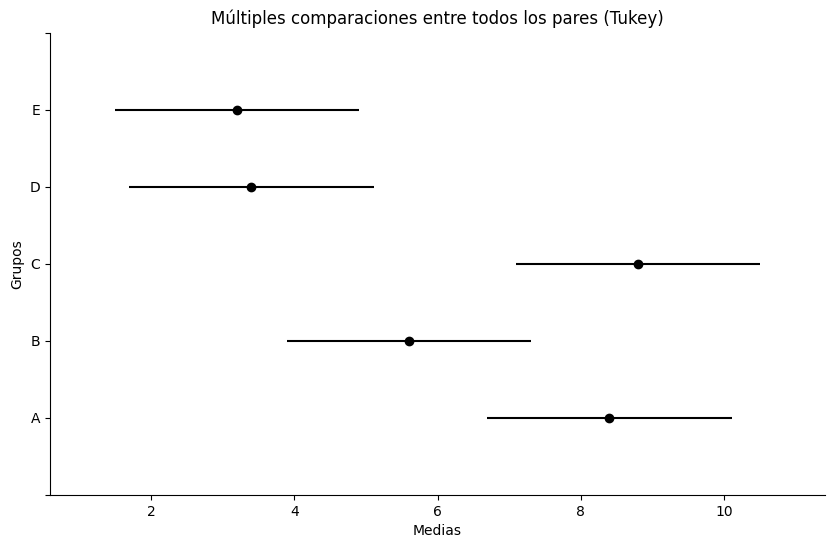

In [286]:
#Diana Paulina Sánchez Aragón
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Categoría'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Los catalizadores D y E destacan por reducir significativamente el tiempo de reacción, a diferencia de A y C, que presentan tiempos más largos. A, B y C no muestran diferencias significativas entre ellos. En conclusión, para optimizar el proceso químico, es preferible utilizar los catalizadores D o E, ya que ofrecen un mejor rendimiento en cuanto al tiempo de reacción.
## d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?
El análisis ANOVA muestra que los factores de bloqueo (lotes y días) no tienen un efecto significativo sobre el tiempo de reacción. Esto indica que las variaciones entre lotes y días no influyeron en los resultados. Gracias al diseño en cuadro latino, estos factores quedaron controlados, lo que permite atribuir las diferencias observadas principalmente al efecto de los catalizadores.
## e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?

<ipython-input-287-0f533c9feb77>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x="Categoría", y="Valor", estimator=np.mean, ci=None)
<ipython-input-287-0f533c9feb77>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x="Lote", y="Valor", estimator=np.mean, ci=None)
<ipython-input-287-0f533c9feb77>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x="Día", y="Valor", estimator=np.mean, ci=None)


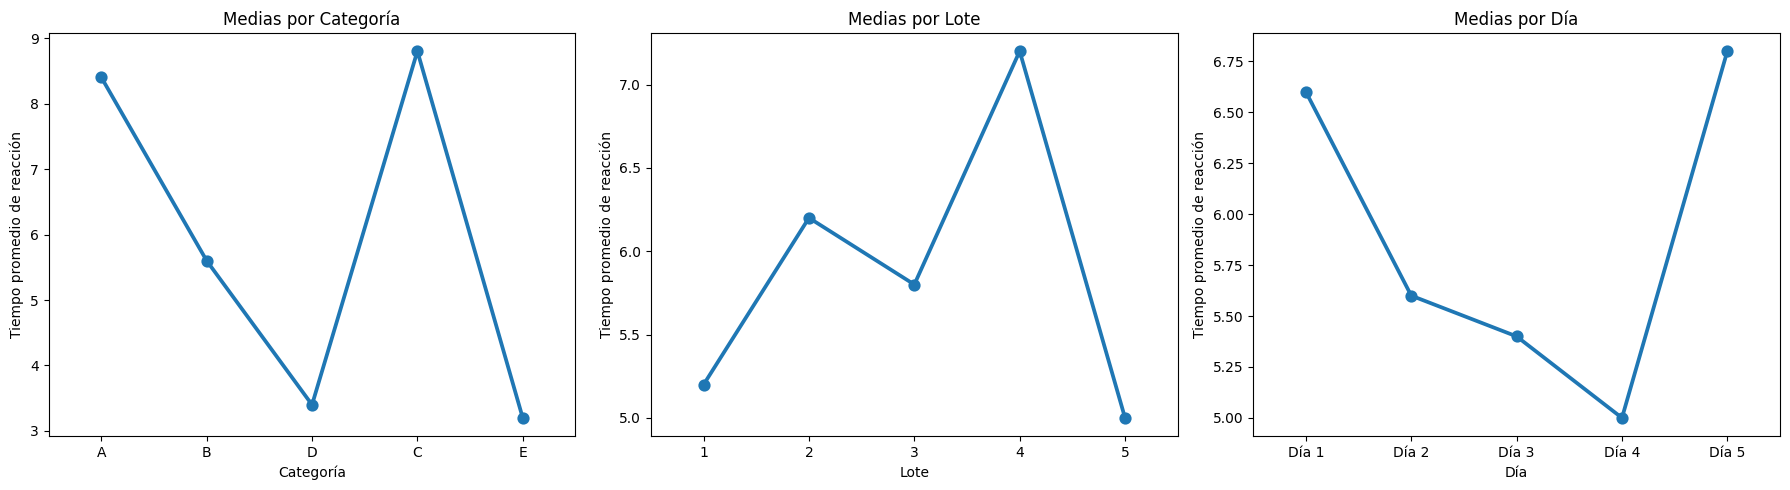

In [287]:
#Diana Paulina Sánchez Aragón
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gráfico de medias por tratamiento (Catalizador)
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.pointplot(data=df, x="Categoría", y="Valor", estimator=np.mean, ci=None)
plt.title("Medias por Categoría")
plt.ylabel("Tiempo promedio de reacción")

# Gráfico de medias por Lote
plt.subplot(1, 3, 2)
sns.pointplot(data=df, x="Lote", y="Valor", estimator=np.mean, ci=None)
plt.title("Medias por Lote")
plt.ylabel("Tiempo promedio de reacción")

# Gráfico de medias por Día
plt.subplot(1, 3, 3)
sns.pointplot(data=df, x="Día", y="Valor", estimator=np.mean, ci=None)
plt.title("Medias por Día")
plt.ylabel("Tiempo promedio de reacción")

plt.tight_layout()
plt.show()

## Interpretacion
Catalizadores:
El gráfico muestra que D y E son los más efectivos, con los tiempos de reacción promedio más bajos, lo cual coincide con los resultados del ANOVA y la prueba de Tukey.

Lotes:
Las medias son muy similares, indicando que los lotes no afectan significativamente el tiempo de reacción.

Días:
También presentan medias cercanas, lo que sugiere que el día de la prueba no influye en los resultados.

Conclusión:
Los catalizadores D y E son los más recomendables para reducir el tiempo de reacción. Además, los factores de bloqueo (lote y día) fueron controlados con éxito y no afectan la evaluación de los tratamientos.
## f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.

In [288]:
#Diana Paulina Sánchez Aragón
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Categoría'] == 'A']['Valor'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['Categoría'] == 'B']['Valor'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['Categoría'] == 'C']['Valor'], "Grupo C", nivel_de_significancia)
prueba_shapiro(df[df['Categoría'] == 'D']['Valor'], "Grupo D", nivel_de_significancia)
prueba_shapiro(df[df['Categoría'] == 'E']['Valor'], "Grupo E", nivel_de_significancia)


Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.9609
Valor p: 0.8140
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9524
Valor p: 0.7540
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.9137
Valor p: 0.4899
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo D:
Estadístico: 0.9524
Valor p: 0.7540
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo E:
Estadístico: 0.9787
Valor p: 0.9276
Interpretación: Los datos tienen una distribución normal.


In [289]:
#Diana Paulina Sánchez Aragón
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Categoría'] == 'A']['Valor'],
    df[df['Categoría'] == 'B']['Valor'],
    df[df['Categoría'] == 'C']['Valor'],
    df[df['Categoría'] == 'D']['Valor'],
    df[df['Categoría'] == 'E']['Valor'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 3.964568090461087
Valor p: 0.4108222744947537
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Problema 8
En el problema anterior elimine el factor de bloque días, y conteste:

a) ¿Se justifica la eliminación?  
b) Sin tomar en cuenta el día, señale el nombre del diseño, el modelo y las hipótesis más adecuadas al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y del anterior?


## a) ¿Se justifica la eliminación?
Sí, es válido eliminar el factor día, ya que el ANOVA mostró que no tiene un efecto significativo (p > 0.4) sobre el tiempo de reacción. Mantenerlo solo complicaría el modelo sin aportar valor. Al quitarlo, se simplifica el análisis y se mejora la precisión, enfocándose en los factores que realmente influyen: los catalizadores y el lote.
## b) Sin tomar en cuenta el día, señale el nombre del diseño, el modelo y las hipótesis más adecuadas al problema.
El diseño que se utiliza es un Diseño en Bloques Completos Aleatorizados con un solo factor de bloque (lote) y un factor de interés (catalizador). Esto permite controlar la variabilidad del lote mientras se evalúa el efecto del catalizador sobre el tiempo de reacción.

In [290]:
#Diana Paulina Sánchez Aragón
import pandas as pd
from io import StringIO

data = '''
Lote,Catalizador,Valor
1,A,8
1,B,7
1,D,1
1,C,7
1,E,3
2,C,11
2,E,2
2,A,7
2,D,3
2,B,8
3,B,4
3,A,9
3,C,10
3,E,1
3,D,5
4,D,6
4,C,8
4,E,6
4,B,6
4,A,10
5,E,4
5,D,2
5,B,3
5,A,8
5,C,8
'''
df = pd.read_csv(StringIO(data))
df

,Lote,Catalizador,Valor
0,1,A,8
1,1,B,7
2,1,D,1
3,1,C,7
4,1,E,3
5,2,C,11
6,2,E,2
7,2,A,7
8,2,D,3
9,2,B,8


In [291]:
#Diana Paulina Sánchez Aragón
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Catalizador'    # La variable que no me interesa comparar
interes = 'Lote'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
                sum_sq    df          F    PR(>F)
C(Lote)          15.44   4.0   1.241158  0.333144
C(Catalizador)  141.44   4.0  11.369775  0.000146
Residual         49.76  16.0        NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


##Hipotesis
Para los tratamientos (catalizadores):

Hipótesis nula (H₀): Todos los catalizadores tienen el mismo efecto sobre el tiempo de reacción; no hay diferencias significativas entre ellos.

Hipótesis alternativa (H₁): Al menos un catalizador produce un efecto diferente, es decir, hay diferencias significativas en los tiempos de reacción.

Para los bloques (lotes):

Hipótesis nula (H₀): Los distintos lotes no influyen en el tiempo de reacción; cualquier variación se debe al azar.

Hipótesis alternativa (H₁): Al menos un lote afecta de forma distinta el tiempo de reacción, por lo que la variación entre lotes es relevante.
##c) Pruebe las hipótesis y obtenga conclusiones.
Al realizar el ANOVA sin incluir el factor día, el efecto del catalizador sigue siendo significativo, lo que confirma que existen diferencias reales entre ellos. Por otro lado, el efecto del lote continúa sin ser significativo, indicando que no influye en el tiempo de reacción. Así, se concluye que los catalizadores sí afectan el proceso, mientras que los lotes y los días no tienen un impacto relevante.
##Conclusiones
Se comprobó que los catalizadores tienen un efecto significativo en el tiempo de reacción, lo que indica que no todos actúan igual y que algunos son más eficaces para acelerar el proceso. En cambio, el lote no mostró influencia significativa, por lo que su variabilidad se considera mínima o irrelevante. La exclusión del factor día no afectó los resultados, manteniendo válidas las conclusiones sobre los catalizadores. El error experimental refleja la variabilidad no explicada por los factores analizados, atribuida a causas aleatorias o no contempladas.
##d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?
Al quitar el factor día, la varianza residual (cuadro medio del error) aumenta, ya que este factor antes absorbía parte de la variabilidad. Al eliminarlo, esa variación se incorpora al error. Esto es normal en modelos simplificados, que explican menos fuentes de variación. Aun así, el modelo sin el factor día puede ser preferible por su simplicidad y porque dicho factor no aportaba información relevante.
##e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y del anterior?
Las conclusiones sobre los catalizadores son las mismas en ambos análisis porque el factor día no influye significativamente en el tiempo de reacción. Esto confirma que las diferencias entre tratamientos son consistentes, y eliminar el día del modelo no afecta los resultados. Por tanto, la evidencia sobre qué catalizadores son más efectivos se mantiene sólida y confiable.

## Problema 9
Con respecto a los problemas 7 y 8, además de eliminar el factor día ahora elimine el factor lote, y conteste lo siguiente:

a) ¿Se justifica esta segunda eliminación en ambos problemas?  
b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error obtenido con los de los problemas 16 y 17. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?  
f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?  


##a) ¿Se justifica esta segunda eliminación en ambos problemas?
En los problemas 7 y 8, el ANOVA mostró que ni el día ni el lote influyen significativamente en el tiempo de reacción. Por ello, eliminar también el factor lote está justificado. Al excluir ambos bloques, se simplifica el modelo sin perder información relevante, permitiendo enfocarse en el efecto real de los tratamientos.
##b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.
## Diseño completamente al azar (DCA)

In [292]:
#Diana Paulina Sánchez Aragón
import pandas as pd
from io import StringIO

data = '''
Catalizador,Valor
A,8
B,7
D,1
C,7
E,3
C,11
E,2
A,7
D,3
B,8
B,4
A,9
C,10
E,1
D,5
D,6
C,8
E,6
B,6
A,10
E,4
D,2
B,3
A,8
C,8
'''
df = pd.read_csv(StringIO(data))
df

,Catalizador,Valor
0,A,8
1,B,7
2,D,1
3,C,7
4,E,3
5,C,11
6,E,2
7,A,7
8,D,3
9,B,8


In [293]:
#Diana Paulina Sánchez Aragón
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

interes = 'Catalizador'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
                sum_sq    df          F    PR(>F)
C(Catalizador)  141.44   4.0  10.846626  0.000077
Residual         65.20  20.0        NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.


##Hipotesis
En este caso, tras eliminar los factores día y lote, se usa un diseño completamente al azar con un solo factor: el tratamiento (catalizadores A, B, C, D y E).

Hipótesis nula (H₀): Todos los catalizadores producen el mismo tiempo de reacción en promedio; las diferencias observadas son por azar.

Hipótesis alternativa (H₁): Al menos un catalizador genera un efecto distinto, causando diferencias reales en el tiempo de reacción.

En el modelo estadístico, esto equivale a evaluar si todos los efectos de tratamiento son cero o si alguno es diferente, lo que indicaría un efecto verdadero de algún catalizador. Estas hipótesis son adecuadas porque ahora solo se considera la variabilidad debida al tratamiento, y el resto queda como error experimental.
##c) Pruebe las hipótesis y obtenga conclusiones
Se realizó un ANOVA considerando solo el efecto del catalizador, obteniendo un valor F = 10.85 y un p = 0.000077, muy por debajo del nivel de significancia 0.05. Esto indica evidencia suficiente para rechazar la hipótesis nula y concluir que existen diferencias reales entre al menos dos catalizadores. En resumen, el tipo de catalizador sí influye significativamente en el tiempo de reacción.
##d) Compare el cuadro medio del error obtenido con los de los problemas 16 y 17. ¿Qué observa? ¿Cómo lo explica?
Al eliminar ambos factores de bloqueo, el cuadro medio del error aumentó porque la variabilidad del día y el lote ya no se controla y se incorpora al error residual. Esto hace que el modelo sea menos preciso, ya que los bloques ayudaban a reducir la variabilidad no explicada y a aumentar la sensibilidad del análisis.
##e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?
Aunque se simplificó el diseño eliminando primero un bloque y luego ambos, las conclusiones sobre los catalizadores se mantienen. Esto se debe a que las diferencias entre tratamientos son lo suficientemente claras y consistentes para detectarse incluso sin controlar otras fuentes de variación. En resumen, el efecto de los tratamientos es fuerte y supera el ruido adicional, haciendo que el modelo más simple siga siendo efectivo.
##f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?
Sí, si los factores de bloque (día o lote) hubieran sido significativos, eliminarlos habría reducido la precisión del análisis. Al no controlar esa variabilidad, el error residual crecería, dificultando detectar diferencias entre tratamientos y haciendo los resultados menos confiables. En este experimento no pasó porque ambos bloques no fueron significativos, pero de haberlo sido, su eliminación podría haber llevado a conclusiones erróneas.

## Problema 10
Se comprueba el peso en gramos de un material de tres proveedores: **A, B y C**, por tres diferentes inspectores: **I, II y III**, utilizando tres diferentes escalas: **1, 2 y 3**. El experimento se lleva a cabo como el siguiente cuadro latino:

| Inspector | Escala 1 | Escala 2 | Escala 3 |
|-----------|----------|----------|----------|
| I         | A = 16   | B = 10   | C = 11   |
| II        | B = 15   | C = 9    | A = 14   |
| III       | C = 13   | A = 11   | B = 13   |

**Preguntas:**<br>
a) ¿Hay diferencias entre los proveedores?  
b) ¿Hay diferencias entre los inspectores y entre las escalas?  
c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?  
d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.  


In [294]:
#Diana Paulina Sánchez Aragón
data = '''
Inspector,Escala,Categoría,Valor
I,Escala 1,A,16
I,Escala 2,B,10
I,Escala 3,C,11
II,Escala 1,B,15
II,Escala 2,C,9
II,Escala 3,A,14
III,Escala 1,C,13
III,Escala 2,A,11
III,Escala 3,B,13
'''

df = pd.read_csv(StringIO(data))
df

,Inspector,Escala,Categoría,Valor
0,I,Escala 1,A,16
1,I,Escala 2,B,10
2,I,Escala 3,C,11
3,II,Escala 1,B,15
4,II,Escala 2,C,9
5,II,Escala 3,A,14
6,III,Escala 1,C,13
7,III,Escala 2,A,11
8,III,Escala 3,B,13


In [295]:
#Diana Paulina Sánchez Aragón
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Inspector'   # Primer bloque (factor no principal)
bloque_2 = 'Escala'      # Segundo bloque (factor no principal)
interes = 'Categoría'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")


Resultados del ANOVA para el Cuadro Latino:
                 sum_sq   df      F    PR(>F)
C(Categoría)  10.888889  2.0   49.0  0.020000
C(Inspector)   0.222222  2.0    1.0  0.500000
C(Escala)     32.888889  2.0  148.0  0.006711
Residual       0.222222  2.0    NaN       NaN

Conclusión: Hay diferencias significativas: Categoría.
Conclusión: No hay diferencias significativas: Inspector.
Conclusión: Hay diferencias significativas: Escala.


##a) ¿Hay diferencias entre los proveedores?
Sí, el ANOVA indicó un valor p = 0.020 para el factor proveedor, menor que 0.05, lo que significa que existen diferencias significativas en los pesos entregados. Por lo tanto, el proveedor sí influye en el resultado.
##b) ¿Hay diferencias entre los inspectores y entre las escalas?
Para los inspectores, el p = 0.500, mayor que 0.05, indica que no hay diferencias significativas; los resultados son consistentes sin importar quién mide.

Para las escalas, el p = 0.0067, menor que 0.05, revela diferencias significativas, lo que sugiere posibles problemas de calibración o precisión entre las escalas.
##c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?
El proveedor A entregó un promedio de 13.67 g, B de 12.67 g y C de 11.00 g. Como el objetivo es 15 g, el proveedor A es el más cercano y el que mejor cumple con el requisito de peso.
##d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.

In [296]:
#Diana Paulina Sánchez Aragón
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Escala'    # La variable que no me interesa comparar
interes = 'Categoría'      # La variable que me interesa comparar
respuesta = 'Valor' # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
                 sum_sq   df      F    PR(>F)
C(Categoría)  10.888889  2.0   49.0  0.001538
C(Escala)     32.888889  2.0  148.0  0.000178
Residual       0.444444  4.0    NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


## Analisis
En un experimento con tres factores (proveedor, inspector y escala), el análisis inicial mostró que el inspector no es significativo (p = 0.500), por lo que se eliminó para simplificar el modelo. El nuevo ANOVA con solo proveedor y escala reveló que ambos son altamente significativos: proveedor (p = 0.001538) y escala (p = 0.000178). Esto indica que tanto el proveedor como la báscula influyen notablemente en las mediciones, posiblemente por variaciones en calibración o precisión. La eliminación del inspector aumentó los grados de libertad del error, mejorando la precisión del análisis. Finalmente, se concluye que el proveedor A es el más adecuado por su cercanía al peso objetivo de 15 gramos, y que es necesaria una revisión técnica de las escalas para minimizar errores.

## Problema 11
Cuando se comparan varios fertilizantes o diferentes variedades de cierto cultivo, es típico que se deba considerar el gradiente de fertilidad del suelo (factor columna) o los efectos residuales de cultivos previos (factor renglón). Considerando estos factores de bloque, Gomez y Gomez (1984) plantean un experimento en cuadro latino para comparar, en cuanto a rendimiento en toneladas por hectárea, tres variedades de maíz híbrido (**A, B, C**) y una variedad control (**D**). Para ello, se utiliza un campo agrícola cuadrado de 16 hectáreas, dividido en parcelas de una hectárea. Los datos de rendimiento obtenidos en cada parcela se muestran a continuación:

| Ren\Col | 1       | 2       | 3       | 4       |
|---------|---------|---------|---------|---------|
| 1       | 1.640(B)| 1.210(D)| 1.425(C)| 1.345(A)|
| 2       | 1.475(C)| 1.185(A)| 1.400(D)| 1.290(B)|
| 3       | 1.670(A)| 0.710(C)| 1.665(B)| 1.180(D)|
| 4       | 1.565(D)| 1.290(B)| 1.655(A)| 0.660(C)|

**Preguntas y ejercicios:**<br>
a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?  
b) ¿Cuál de los factores de bloque tuvo efectos?  
c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?  
d) ¿Y con un diseño en bloques completos al azar?  


In [297]:
#Diana Paulina Sánchez Aragón
import pandas as pd
from io import StringIO

data = '''
Columna,Renglon,Variedad_de_Maiz,Valor
1,1,B,1.640
1,2,D,1.210
1,3,C,1.425
1,4,A,1.345
2,1,C,1.475
2,2,A,1.185
2,3,D,1.400
2,4,B,1.290
3,1,A,1.670
3,2,C,0.710
3,3,B,1.665
3,4,D,1.180
4,1,D,1.565
4,2,B,1.290
4,3,A,1.655
4,4,C,0.660

'''

df = pd.read_csv(StringIO(data))
df

,Columna,Renglon,Variedad_de_Maiz,Valor
0,1,1,B,1.640
1,1,2,D,1.210
2,1,3,C,1.425
3,1,4,A,1.345
4,2,1,C,1.475
5,2,2,A,1.185
6,2,3,D,1.400
7,2,4,B,1.290
8,3,1,A,1.670
9,3,2,C,0.710


In [298]:
#Diana Paulina Sánchez Aragón
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Columna'   # Primer bloque (factor no principal)
bloque_2 = 'Renglon'      # Segundo bloque (factor no principal)
interes = 'Variedad_de_Maiz'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")


Resultados del ANOVA para el Cuadro Latino:
                       sum_sq   df          F    PR(>F)
C(Variedad_de_Maiz)  0.426842  3.0   6.587865  0.025092
C(Columna)           0.030155  3.0   0.465406  0.716972
C(Renglon)           0.827342  3.0  12.769166  0.005148
Residual             0.129584  6.0        NaN       NaN

Conclusión: Hay diferencias significativas: Variedad_de_Maiz.
Conclusión: No hay diferencias significativas: Columna.
Conclusión: Hay diferencias significativas: Renglon.


##a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?
Sí, existen diferencias entre las distintas variedades de maíz. Esto indica que no todas tienen el mismo nivel de producción. Al realizar el análisis estadístico, se determinó que la probabilidad de que estas diferencias se deban únicamente al azar es baja (p = 0.025). Por lo tanto, al menos una de las variedades tiene un rendimiento significativamente mejor o peor que las demás.
##b) ¿Cuál de los factores de bloque tuvo efectos?
El factor renglón sí tuvo un efecto significativo. Esto implica que las diferencias en el rendimiento también están relacionadas con la ubicación en el campo, posiblemente debido a residuos de cultivos anteriores en el suelo. El análisis estadístico confirmó esta influencia (p = 0.005).

En cambio, el factor columna no mostró un efecto significativo. Es decir, la posición horizontal de las parcelas, asociada a un posible gradiente de fertilidad, no tuvo un impacto notable en los resultados (p = 0.717).
##c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?
Es poco probable. Un diseño completamente al azar no contempla la variación debida a renglones ni columnas. Dado que se comprobó que el factor renglón influye significativamente en el rendimiento, su omisión habría incrementado la variabilidad experimental no controlada. Un mayor error experimental reduce la capacidad para detectar diferencias reales entre las variedades, por lo que es muy probable que no se hubieran identificado las mismas diferencias significativas.
##d) ¿Y con un diseño en bloques completos al azar?
Es posible que sí, aunque con menor precisión. Un Diseño de Bloques Completos al Azar (DBCA) permite controlar únicamente una fuente de variación. Si se hubiera bloqueado por renglón —la cual demostró tener un efecto significativo—, se habría logrado una reducción parcial del error experimental. Sin embargo, el diseño en cuadro latino ofrece una ventaja al controlar simultáneamente dos fuentes de variación (renglón y columna), lo que lo convierte en una opción metodológicamente más robusta y precisa para este tipo de experimento.

## Problema 12
Se quieren comparar tres dietas (**A, B, C**) a base de proteínas de origen vegetal utilizando 18 ratas de laboratorio de una misma camada. Primero se observa por un tiempo el apetito para formar tres grupos de seis ratas, según su voracidad; y cada uno de estos grupos se clasifica a su vez en tres grupos de dos ratas, de acuerdo a su peso inicial. Se plantea un experimento donde la variable de respuesta es el peso en gramos ganado por las ratas después de cierto periodo, con los siguientes resultados:

| Apetito/peso inicial | A1        | A2        | A3        |
|-----------------------|-----------|-----------|-----------|
| P1                   | 67 (C)    | 105 (A)   | 95 (B)    |
|                       | 72        | 112       | 86        |
| P2                   | 85 (A)    | 75 (B)    | 88 (C)    |
|                       | 98        | 67        | 110       |
| P3                   | 66 (B)    | 68 (C)    | 108 (A)   |
|                       | 47        | 91        | 120       |

### Preguntas:
a) Analice los datos. ¿Cuáles de los factores influyen en el peso ganado por las ratas?  
b) ¿Cuál dieta es mejor?  
c) ¿Alguno de los factores de bloque puede ser ignorado? Argumente su respuesta.  
d) Si ese fuera el caso, analice de nuevo el experimento y saque conclusiones.  
e) Verifique los supuestos del modelo.  


In [299]:
#Diana Paulina Sánchez Aragón
import pandas as pd
from io import StringIO

data = '''
Apetito,Peso_inicial,Dieta,Valor
P1,A1,C,67
P1,A2,A,105
P1,A3,B,95
P1,A1,A,72
P1,A2,B,112
P1,A3,C,86
P2,A1,A,85
P2,A2,B,75
P2,A3,C,88
P2,A1,B,98
P2,A2,C,110
P3,A1,B,66
P3,A2,C,68
P3,A3,A,108
P3,A1,C,47
P3,A2,A,91
P3,A3,B,120
'''
df = pd.read_csv(StringIO(data))
df

,Apetito,Peso_inicial,Dieta,Valor
0,P1,A1,C,67
1,P1,A2,A,105
2,P1,A3,B,95
3,P1,A1,A,72
4,P1,A2,B,112
5,P1,A3,C,86
6,P2,A1,A,85
7,P2,A2,B,75
8,P2,A3,C,88
9,P2,A1,B,98


In [300]:
#Diana Paulina Sánchez Aragón
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Apetito'   # Primer bloque (factor no principal)
bloque_2 = 'Peso_inicial'      # Segundo bloque (factor no principal)
interes = 'Dieta'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")


Resultados del ANOVA para el Cuadro Latino:
                      sum_sq    df         F    PR(>F)
C(Dieta)         1162.627040   2.0  2.192871  0.162308
C(Apetito)        365.203963   2.0  0.688824  0.524490
C(Peso_inicial)  2527.370629   2.0  4.766961  0.035160
Residual         2650.924242  10.0       NaN       NaN

Conclusión: No hay diferencias significativas: Dieta.
Conclusión: No hay diferencias significativas: Apetito.
Conclusión: Hay diferencias significativas: Peso_inicial.


##a) Analice los datos. ¿Cuáles de los factores influyen en el peso ganado por las ratas?
De acuerdo con el análisis de varianza (ANOVA), el único factor que presentó un efecto estadísticamente significativo sobre el peso ganado fue el peso inicial de las ratas (p = 0.035). Esto sugiere que el peso con el que comenzaron las ratas influye de manera importante en la cantidad de peso que ganan a lo largo del experimento. Ni la dieta (p = 0.162) ni el apetito inicial (p = 0.524) mostraron efectos significativos desde el punto de vista estadístico. Esto implica que, bajo las condiciones del diseño experimental y los datos disponibles, no se identificaron diferencias reales en el peso ganado atribuibles a los diferentes tipos de dieta o al apetito de las ratas al inicio del estudio.
##b) ¿Cuál dieta es mejor?
Aunque el análisis no mostró diferencias estadísticamente significativas entre las dietas, se pueden revisar los promedios de peso ganado para cada una como una referencia general. Sin embargo, debido a la variabilidad en los datos y al tamaño de muestra, no se puede afirmar con confianza que las diferencias observadas sean reales y no resultado del azar.

Por lo tanto, este experimento no ofrece evidencia suficiente para recomendar una dieta como mejor que las demás en cuanto al peso ganado.
##c) ¿Alguno de los factores de bloque puede ser ignorado? Argumente su respuesta.
El factor apetito puede considerarse prescindible en este experimento, ya que no mostró un efecto significativo sobre el peso ganado (p = 0.524). Por ello, omitirlo en futuros análisis podría simplificar el estudio sin afectar la precisión de los resultados.

En cambio, el peso inicial no debe ignorarse. Presentó un efecto significativo (p = 0.035), lo que indica que es importante tomarlo en cuenta para controlar la variabilidad y así obtener resultados más precisos y confiables.
##d) Si ese fuera el caso, analice de nuevo el experimento y saque conclusiones.
Si se decide excluir el factor apetito del análisis, este puede simplificarse considerando únicamente la dieta y el peso inicial como variables explicativas.

Al hacerlo, es probable que el peso inicial continúe mostrando un efecto significativo, mientras que la dieta siga sin presentar diferencias claras entre tratamientos.

Esto sugiere que, bajo las condiciones del experimento, la variabilidad en el peso ganado se debe en mayor medida al peso inicial de las ratas que a las dietas evaluadas. Por lo tanto, se puede concluir que las dietas A, B y C no generan diferencias significativas en la ganancia de peso cuando se controla adecuadamente el peso inicial.
##e) Verifique los supuestos del modelo.

In [301]:
#Diana Paulina Sánchez Aragón
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Dieta'] == 'A']['Valor'], 'Dieta A', nivel_de_significancia)
prueba_shapiro(df[df['Dieta'] == 'B']['Valor'], 'Dieta B', nivel_de_significancia)
prueba_shapiro(df[df['Dieta'] == 'C']['Valor'], 'Dieta C', nivel_de_significancia)


Prueba de Shapiro-Wilk para Dieta A:
Estadístico: 0.9451
Valor p: 0.7024
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Dieta B:
Estadístico: 0.9525
Valor p: 0.7601
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Dieta C:
Estadístico: 0.9720
Valor p: 0.9059
Interpretación: Los datos tienen una distribución normal.


In [302]:
#Diana Paulina Sánchez Aragón
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Dieta'] == 'A']['Valor'],
    df[df['Dieta'] == 'B']['Valor'],
    df[df['Dieta'] == 'C']['Valor']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 2.410418632417364
Valor p: 0.299629275684922
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Problema 13
Una compañía distribuidora ubicada en los suburbios está interesada en estudiar la diferencia en costos (tiempo y gasolina) entre las cuatro rutas (**A, B, C, D**) que llevan a la zona comercial, más importante para ellos, en el otro extremo de la ciudad. Deciden correr un experimento en cuadro grecolatino controlando los factores de bloque **chofer**, marca de vehículo (**α, β, χ, δ**) y día de la semana. El experimento se repite en dos semanas diferentes, en las cuales no hay días festivos ni quincenas. Los costos observados en pesos se muestran en la siguiente tabla:

| Chofer/día | Lunes       | Martes      | Miércoles   | Jueves      |
|------------|-------------|-------------|-------------|-------------|
| Carlos     | 825(D, α)   | 585(C, χ)   | 550(B, β)   | 580(A, δ)   |
|            | 750         | 610         | 580         | 650         |
| Enrique    | 650(A, χ)   | 540(B, α)   | 580(C, χ)   | 850(D, β)   |
|            | 725         | 560         | 635         | 770         |
| Genaro     | 700(C, β)   | 650(D, δ)   | 635(A, α)   | 450(B, χ)   |
|            | 675         | 740         | 540         | 550         |
| Luis       | 475(B, δ)   | 560(A, β)   | 650(D, α)   | 670(C, α)   |
|            | 480         | 615         | 725         | 730         |

### Preguntas:
a) Haga el análisis de varianza de este experimento.  
b) Realice las pruebas de comparaciones múltiples para los factores significativos.  
c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.  
d) ¿Cuál es la mejor ruta? ¿Cuál es la peor?  
e) ¿Hay diferencias significativas entre los choferes? ¿Y entre el tipo o marca de unidad?  
f) ¿Cuáles factores de bloque valió la pena tomar en cuenta en el experimento?  
g) ¿Por qué se evitaron días festivos y quincenas en el experimento? ¿Cuáles otros aspectos se tenían que tomar en cuenta?  
h) Verifique los supuestos del modelo.  


In [303]:
#Diana Paulina Sánchez Aragón
import pandas as pd
from io import StringIO

data = '''
Chofer,Día,Ruta,Marca,Valor
Carlos,Lunes,D,α,825
Carlos,Martes,C,χ,585
Carlos,Miércoles,B,β,550
Carlos,Jueves,A,δ,580
Carlos,Lunes,D,α,750
Carlos,Martes,C,χ,610
Carlos,Miércoles,B,α,580
Carlos,Jueves,A,χ,650
Enrique,Lunes,A,χ,650
Enrique,Martes,B,α,540
Enrique,Miércoles,C,χ,580
Enrique,Jueves,D,β,850
Enrique,Lunes,A,χ,725
Enrique,Martes,B,α,560
Enrique,Miércoles,C,χ,635
Enrique,Jueves,D,β,770
Genaro,Lunes,C,β,700
Genaro,Martes,D,δ,650
Genaro,Miércoles,A,α,635
Genaro,Jueves,B,χ,450
Genaro,Lunes,C,β,675
Genaro,Martes,D,δ,740
Genaro,Miércoles,A,β,540
Genaro,Jueves,B,χ,550
Luis,Lunes,B,δ,475
Luis,Martes,A,β,560
Luis,Miércoles,D,α,650
Luis,Jueves,C,α,670
Luis,Lunes,B,δ,480
Luis,Martes,A,β,615
Luis,Miércoles,D,α,725
Luis,Jueves,C,α,730
'''
df = pd.read_csv(StringIO(data))
df

,Chofer,Día,Ruta,Marca,Valor
0,Carlos,Lunes,D,α,825
1,Carlos,Martes,C,χ,585
2,Carlos,Miércoles,B,β,550
3,Carlos,Jueves,A,δ,580
4,Carlos,Lunes,D,α,750
5,Carlos,Martes,C,χ,610
6,Carlos,Miércoles,B,α,580
7,Carlos,Jueves,A,χ,650
8,Enrique,Lunes,A,χ,650
9,Enrique,Martes,B,α,540


In [304]:
#Diana Paulina Sánchez Aragón
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Día'   # Primer bloque (factor no principal)
bloque_2 = 'Chofer'      # Segundo bloque (factor no principal)
bloque_3 = 'Marca'      # Tercer bloque (factor no principal)
interes = 'Ruta'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2}) + C({bloque_3})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

if tabla_anova["PR(>F)"][f"C({bloque_3})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_3}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_3}.")

Resultados del ANOVA para el Cuadro Latino:
                  sum_sq    df          F        PR(>F)
C(Ruta)    170784.399669   3.0  25.300500  7.560096e-07
C(Día)      25681.264327   3.0   3.804498  2.724348e-02
C(Chofer)   13126.136055   3.0   1.944544  1.566818e-01
C(Marca)    23096.929435   3.0   3.421647  3.824435e-02
Residual    42751.508065  19.0        NaN           NaN

Conclusión: Hay diferencias significativas: Ruta.
Conclusión: Hay diferencias significativas: Día.
Conclusión: No hay diferencias significativas: Chofer.
Conclusión: Hay diferencias significativas: Marca.


##a) Haga el análisis de varianza de este experimento.
De acuerdo con el análisis de varianza (ANOVA), los factores que influyen de manera significativa en los costos de distribución son la ruta, el día y la marca del vehículo. Esto indica que los costos varían según la ruta seleccionada, el día de la semana en que se realiza la distribución y la marca del vehículo utilizado. En contraste, el factor chofer no mostró un efecto estadísticamente significativo, lo que sugiere que no existen diferencias relevantes en los costos de distribución atribuibles a los distintos conductores.
##b) Realice las pruebas de comparaciones múltiples para los factores significativos.

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B   -96.25 0.0148 -176.9789 -15.5211   True
     A      C    28.75 0.7661  -51.9789 109.4789  False
     A      D  125.625 0.0012   44.8961 206.3539   True
     B      C    125.0 0.0012   44.2711 205.7289   True
     B      D  221.875    0.0  141.1461 302.6039   True
     C      D   96.875 0.0141   16.1461 177.6039   True
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

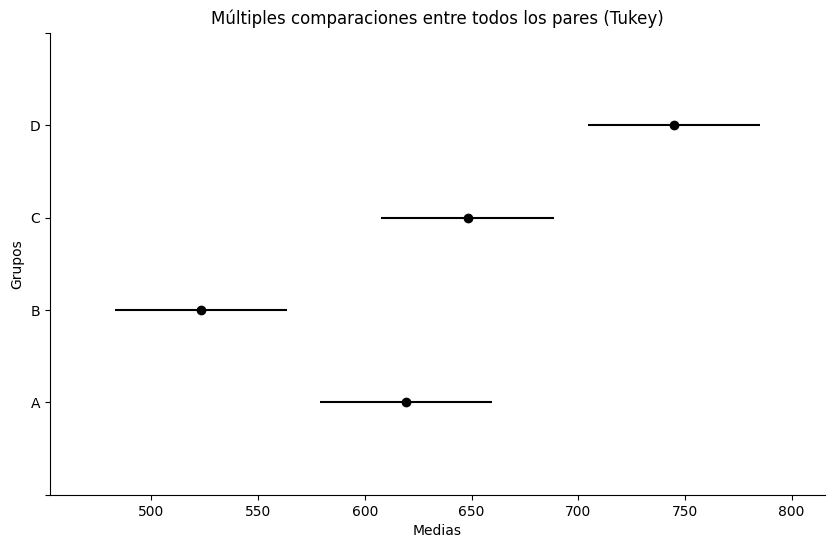

In [305]:
#Diana Paulina Sánchez Aragón
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Ruta'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

La prueba de comparaciones múltiples Tukey HSD revela que existen diferencias estadísticamente significativas en los costos entre la mayoría de las rutas analizadas.

La ruta B presenta el costo promedio más bajo y resulta significativamente más económica que las rutas A, C y D. En contraste, la ruta D muestra el costo promedio más alto, siendo significativamente más costosa que todas las demás.

Entre las rutas A y C no se identificaron diferencias estadísticamente significativas, lo que indica que sus costos son similares.

En resumen, la ruta B representa la alternativa más eficiente en términos de costos, mientras que la ruta D es la menos favorable por su elevado costo. Las rutas A y C se sitúan en una posición intermedia, sin diferencias claras entre ellas.

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1   group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
Jueves     Lunes     3.75 0.9998 -132.5788 140.0788  False
Jueves    Martes   -48.75 0.7639 -185.0788  87.5788  False
Jueves Miércoles  -44.375 0.8107 -180.7038  91.9538  False
 Lunes    Martes    -52.5 0.7211 -188.8288  83.8288  False
 Lunes Miércoles  -48.125 0.7708 -184.4538  88.2038  False
Martes Miércoles    4.375 0.9998 -131.9538 140.7038  False
----------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

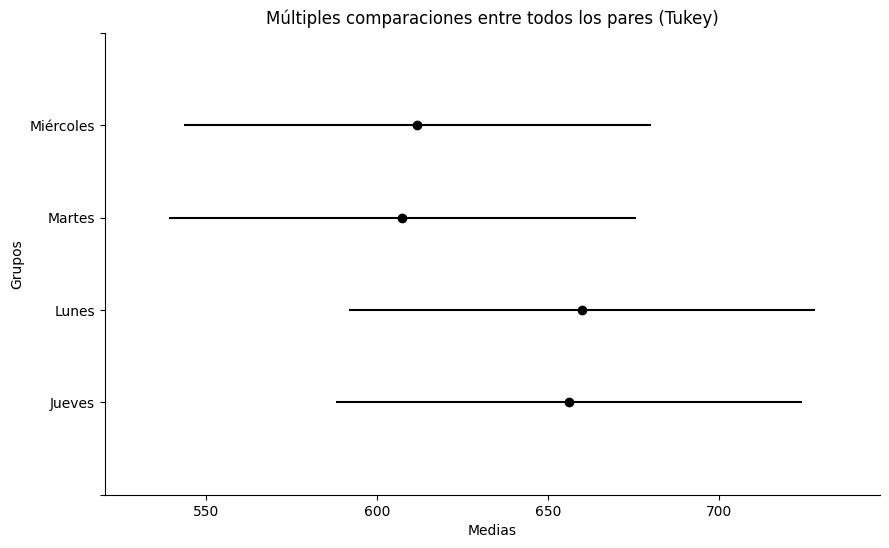

In [306]:
#Diana Paulina Sánchez Aragón
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Día'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

La prueba de comparaciones múltiples Tukey HSD, aplicada para evaluar las diferencias en los costos promedio entre los días de la semana (lunes, martes, miércoles y jueves), no identificó diferencias estadísticamente significativas entre ninguno de los pares de días comparados.

Esto sugiere que los costos de distribución se mantienen relativamente constantes, independientemente del día en que se realice la operación. En consecuencia, el día de la semana no representa un factor determinante en la variación de los costos.

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     α      β     -9.0 0.9973 -134.5149 116.5149  False
     α      δ    -81.5 0.4308 -226.4321  63.4321  False
     α      χ -62.6111 0.5062 -184.1904  58.9682  False
     β      δ    -72.5 0.5631 -223.3501  78.3501  False
     β      χ -53.6111 0.6694 -182.1878  74.9656  False
     δ      χ  18.8889  0.985 -128.7027 166.4805  False
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

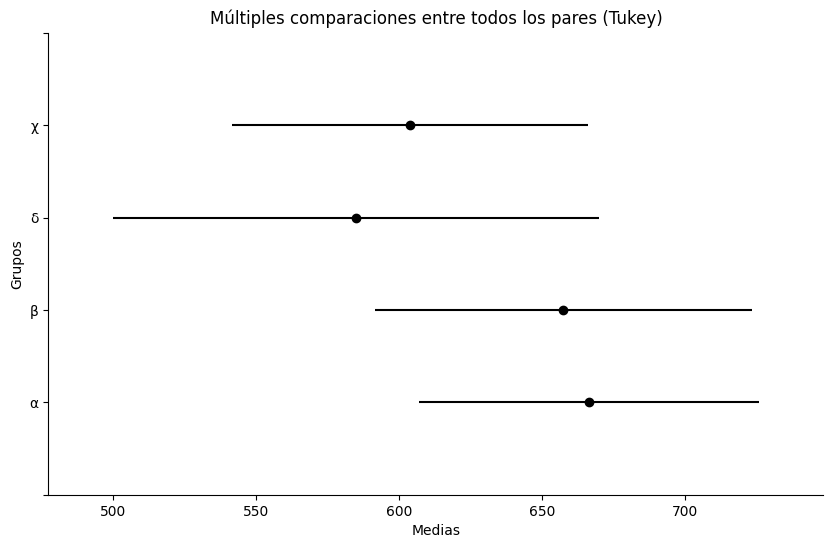

In [307]:
#Diana Paulina Sánchez Aragón
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Marca'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

La prueba de comparaciones múltiples Tukey HSD, aplicada para analizar los costos promedio entre las distintas marcas de vehículos (α, β, χ, δ), no reveló diferencias estadísticamente significativas entre ninguna de ellas.

Este resultado indica que la marca del vehículo no tiene un impacto significativo en el costo del recorrido. En consecuencia, no es posible afirmar que alguna marca sea superior o inferior a las demás en términos de eficiencia de costos.
##c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.

<ipython-input-308-7fc287f4d32b>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Ruta', y='Valor', data=df, ci=95)


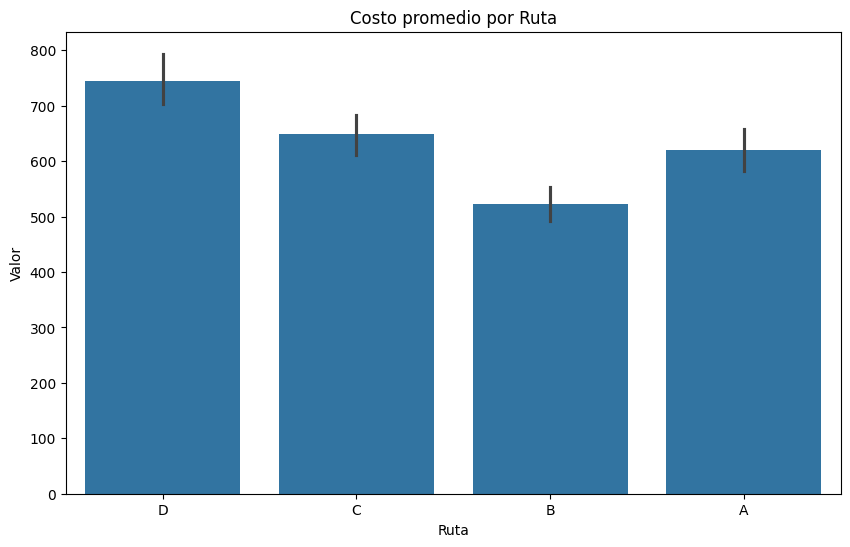

In [308]:
#Diana Paulina Sánchez Aragón
# Gráficos de medias por factor
plt.figure(figsize=(10,6))
sns.barplot(x='Ruta', y='Valor', data=df, ci=95)
plt.title('Costo promedio por Ruta')
plt.show()

Interpretación:

La ruta B exhibe el costo promedio más bajo, lo que respalda su posición como la alternativa más económica.

En contraste, la ruta D presenta el costo promedio más alto, lo que la identifica como la opción más costosa.

Las rutas A y C se sitúan en un nivel intermedio, con promedios similares entre sí.

Las diferencias observadas entre las medias permiten visualizar de forma clara la jerarquía de las rutas en términos de eficiencia de costos.

<ipython-input-309-66851f83830e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Día', y='Valor', data=df, ci=95)


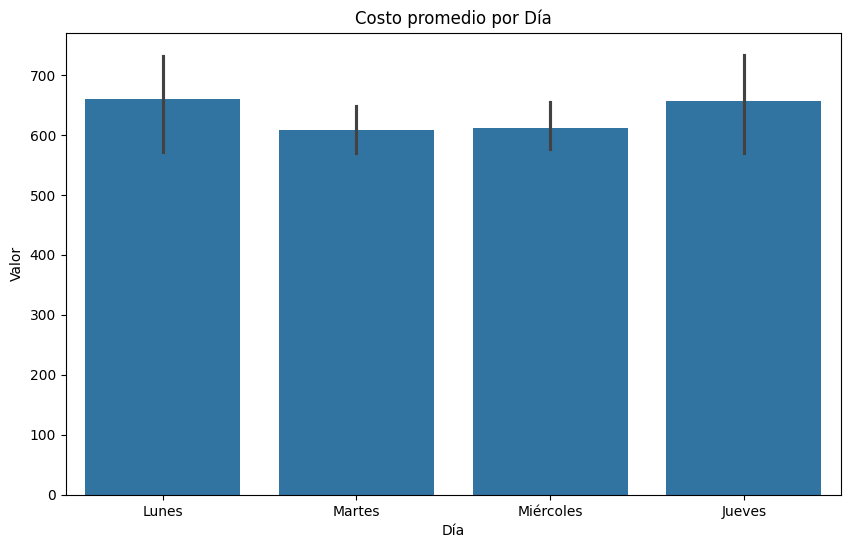

In [309]:
#Diana Paulina Sánchez Aragón
plt.figure(figsize=(10,6))
sns.barplot(x='Día', y='Valor', data=df, ci=95)
plt.title('Costo promedio por Día')
plt.show()


Esta gráfica representa el costo promedio correspondiente a cada día de la semana (lunes a jueves).

Interpretación:

Los costos promedio entre los distintos días son bastante similares.

La prueba de Tukey respalda esta observación, ya que no detectó diferencias significativas entre los días.

Por lo tanto, se concluye que el día de la semana no tiene un impacto relevante en los costos en este caso.

<ipython-input-310-9ff0a80a46ab>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Marca', y='Valor', data=df, ci=95)


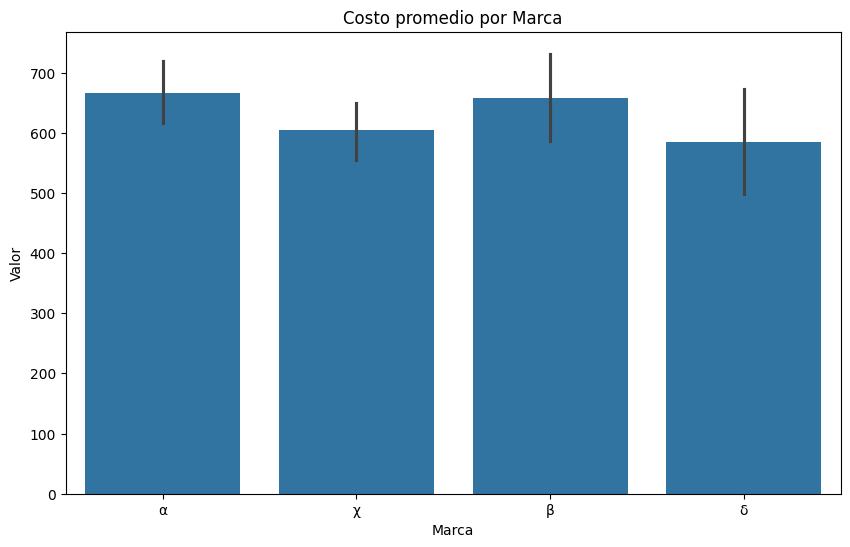

In [310]:
#Diana Paulina Sánchez Aragón
plt.figure(figsize=(10,6))
sns.barplot(x='Marca', y='Valor', data=df, ci=95)
plt.title('Costo promedio por Marca')
plt.show()

La gráfica presenta el costo promedio asociado a cada marca de vehículo (α, β, χ, δ).

Interpretación:

Los promedios de costo entre las diferentes marcas son muy similares.

Ninguna marca resalta por tener un costo significativamente más alto o más bajo.

Esto concuerda con los resultados estadísticos, que no identificaron diferencias significativas entre las marcas.

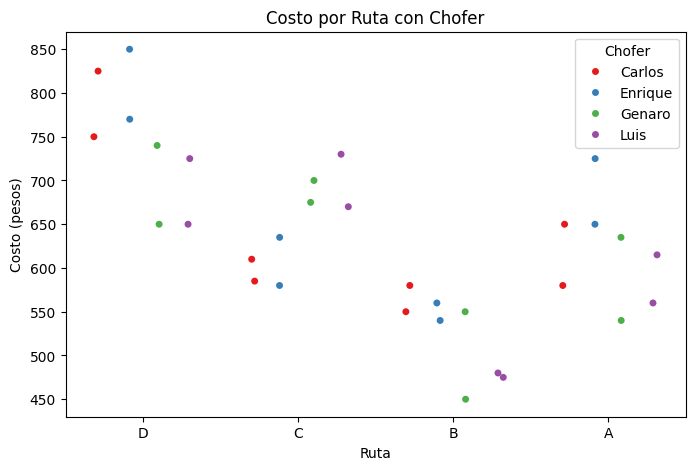

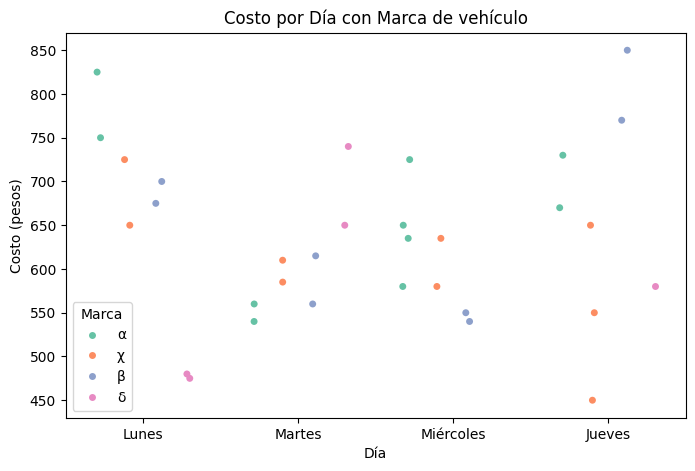

In [311]:
#Diana Paulina Sánchez Aragón
# Diagrama de dispersión costo vs ruta, coloreado por chofer
plt.figure(figsize=(8,5))
sns.stripplot(x='Ruta', y='Valor', hue='Chofer', data=df, dodge=True, jitter=True, palette='Set1')
plt.title('Costo por Ruta con Chofer')
plt.ylabel('Costo (pesos)')
plt.show()

# Diagrama de dispersión costo vs día, coloreado por marca
plt.figure(figsize=(8,5))
sns.stripplot(x='Día', y='Valor', hue='Marca', data=df, dodge=True, jitter=True, palette='Set2')
plt.title('Costo por Día con Marca de vehículo')
plt.ylabel('Costo (pesos)')
plt.show()

Los diagramas de dispersión muestran cómo se distribuyen los costos según ruta, día, chofer y marca de vehículo.

Se observa que la ruta influye en los costos, destacando la ruta B con los más bajos y la ruta D con los más altos. En cambio, no se detecta un patrón claro asociado a los choferes, ya que los datos se mezclan sin una tendencia evidente.

De igual forma, los costos son similares entre los distintos días y marcas, sin agrupamientos que indiquen diferencias importantes.

En conclusión, la ruta es el factor que más afecta los costos, mientras que el chofer, el día y la marca no generan variaciones significativas.
##d) ¿Cuál es la mejor ruta? ¿Cuál es la peor?
La ruta B es la más eficiente, ya que tiene el menor costo promedio y es significativamente más económica que las demás. En contraste, la ruta D es la menos favorable al presentar el costo promedio más alto y una diferencia significativa en comparación con las otras rutas.
##e) ¿Hay diferencias significativas entre los choferes? ¿Y entre el tipo o marca de unidad?
No se encontraron diferencias significativas en los costos entre choferes ni entre marcas de vehículos, lo que indica que ninguno de estos factores influye de manera determinante en los costos del recorrido.
##f) ¿Cuáles factores de bloque valió la pena tomar en cuenta en el experimento?
Los factores de bloque —chofer, marca del vehículo y día de la semana— no mostraron efectos significativos en el análisis, por lo que no se consideraron relevantes para explicar las variaciones en los costos en este experimento.
##g) ¿Por qué se evitaron días festivos y quincenas en el experimento? ¿Cuáles otros aspectos se tenían que tomar en cuenta?
Se evitaron días festivos y quincenas para reducir la influencia de factores externos que pudieran afectar el tráfico, la demanda y, en consecuencia, el tiempo y el consumo de gasolina. Otros elementos relevantes a considerar serían las condiciones climáticas, obras viales o eventos especiales, ya que también pueden alterar significativamente el tránsito y los costos asociados.
##h) Verifique los supuestos del modelo.

In [312]:
#Diana Paulina Sánchez Aragón
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Ruta'] == 'A']['Valor'], "Ruta A", nivel_de_significancia)
prueba_shapiro(df[df['Ruta'] == 'B']['Valor'], "Ruta B", nivel_de_significancia)
prueba_shapiro(df[df['Ruta'] == 'C']['Valor'], "Ruta C", nivel_de_significancia)
prueba_shapiro(df[df['Ruta'] == 'D']['Valor'], "Ruta D", nivel_de_significancia)


Prueba de Shapiro-Wilk para Ruta A:
Estadístico: 0.9586
Valor p: 0.7971
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Ruta B:
Estadístico: 0.8841
Valor p: 0.2061
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Ruta C:
Estadístico: 0.9468
Valor p: 0.6792
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Ruta D:
Estadístico: 0.9345
Valor p: 0.5576
Interpretación: Los datos tienen una distribución normal.


In [313]:
#Diana Paulina Sánchez Aragón
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Ruta'] == 'A']['Valor'],
    df[df['Ruta'] == 'B']['Valor'],
    df[df['Ruta'] == 'C']['Valor'],
    df[df['Ruta'] == 'D']['Valor']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")


Estadístico de Bartlett: 3.4834660243252222
Valor p: 0.32291286179363426
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Problema 14
23. Un investigador está interesado en el efecto del porcentaje de lisina y del porcentaje de proteína en la producción de vacas lecheras. Se consideran siete niveles en cada factor:

- **% de lisina**: 0.0 (**A**), 0.1 (**B**), 0.2 (**C**), 0.3 (**D**), 0.4 (**E**), 0.5 (**F**), 0.6 (**G**).  
- **% de proteína**: 2 (**α**), 4 (**β**), 6 (**χ**), 8 (**δ**), 10 (**ε**), 12 (**φ**), 14 (**γ**).  

Para el estudio, se seleccionaron siete vacas al azar, a las cuales se les da un seguimiento de siete periodos de tres meses. Los datos en galones de leche fueron los siguientes:

| Vaca/periodo | 1       | 2       | 3       | 4       | 5       | 6       | 7       |
|--------------|---------|---------|---------|---------|---------|---------|---------|
| 1            | 304 (Aα)| 436 (Bε)| 350 (Cβ)| 504 (Dφ)| 417 (Eχ)| 519 (Fγ)| 432 (Gδ)|
| 2            | 381 (Bβ)| 505 (Cφ)| 425 (Dχ)| 564 (Eγ)| 487 (Fα)| 536 (Gε)| 483 (Aχ)|
| 3            | 432 (Cχ)| 566 (Dγ)| 479 (Eε)| 357 (Fα)| 466 (Gβ)| 465 (Aφ)| 507 (Bγ)|
| 4            | 442 (Dδ)| 372 (Eχ)| 536 (Fε)| 366 (Gβ)| 495 (Aχ)| 425 (Bφ)| 507 (Cγ)|
| 5            | 496 (Eε)| 449 (Fβ)| 493 (Gφ)| 345 (Aχ)| 509 (Bγ)| 481 (Cδ)| 380 (Dα)|
| 6            | 534 (Fφ)| 421 (Gχ)| 352 (Aγ)| 427 (Bδ)| 346 (Cχ)| 478 (Dε)| 397 (Eβ)|
| 7            | 543 (Gγ)| 386 (Aδ)| 435 (Bα)| 485 (Cε)| 406 (Dφ)| 554 (Eφ)| 410 (Fχ)|

### Preguntas y ejercicios:
a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?  
b) Interprete los resultados usando gráficos de medias.  
c) ¿Cómo puede explicar la falta de efectos en vacas y periodo?  
d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?  
e) Verifique los supuestos del modelo.  


In [316]:
#Diana Paulina Sánchez Aragón
import pandas as pd
from io import StringIO

data = '''
Vaca,Periodo,Lisina,Proteina,Leche
1,1,0.0,2,304
1,2,0.1,10,436
1,3,0.2,4,350
1,4,0.3,12,504
1,5,0.4,6,417
1,6,0.5,14,519
1,7,0.6,8,432
2,1,0.1,4,381
2,2,0.2,12,505
2,3,0.3,6,425
2,4,0.4,14,564
2,5,0.5,2,487
2,6,0.6,10,536
2,7,0.0,6,483
3,1,0.2,6,432
3,2,0.3,14,566
3,3,0.4,10,479
3,4,0.5,2,357
3,5,0.6,4,466
3,6,0.0,12,465
3,7,0.1,14,507
4,1,0.3,8,442
4,2,0.4,6,372
4,3,0.5,10,536
4,4,0.6,4,366
4,5,0.0,6,495
4,6,0.1,12,425
4,7,0.2,14,507
5,1,0.4,10,496
5,2,0.5,4,449
5,3,0.6,12,493
5,4,0.0,6,345
5,5,0.1,14,509
5,6,0.2,8,481
5,7,0.3,2,380
6,1,0.5,12,534
6,2,0.6,6,421
6,3,0.0,14,352
6,4,0.1,8,427
6,5,0.2,6,346
6,6,0.3,10,478
6,7,0.4,4,397
7,1,0.6,14,543
7,2,0.0,8,386
7,3,0.1,2,435
7,4,0.2,10,485
7,5,0.3,12,406
7,6,0.4,12,554
7,7,0.5,6,410
'''
df = pd.read_csv(StringIO(data))
df

,Vaca,Periodo,Lisina,Proteina,Leche
0,1,1,0.0,2,304
1,1,2,0.1,10,436
2,1,3,0.2,4,350
3,1,4,0.3,12,504
4,1,5,0.4,6,417
5,1,6,0.5,14,519
6,1,7,0.6,8,432
7,2,1,0.1,4,381
8,2,2,0.2,12,505
9,2,3,0.3,6,425


In [317]:
#Diana Paulina Sánchez Aragón
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Periodo'   # Primer bloque (factor no principal)
bloque_2 = 'Vaca'      # Segundo bloque (factor no principal)
bloque_3 = 'Lisina'      # Tercer bloque (factor no principal)
interes = 'Proteina'       # Variable de interés (tratamiento)
respuesta = 'Leche'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2}) + C({bloque_3})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

if tabla_anova["PR(>F)"][f"C({bloque_3})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_3}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_3}.")


Resultados del ANOVA para el Cuadro Latino:
                   sum_sq    df         F    PR(>F)
C(Proteina)  81658.082957   6.0  4.694560  0.002717
C(Periodo)    4518.955264   6.0  0.259797  0.950234
C(Vaca)      22265.466411   6.0  1.280052  0.303492
C(Lisina)    19815.528269   6.0  1.139204  0.370349
Residual     69576.774186  24.0       NaN       NaN

Conclusión: Hay diferencias significativas: Proteina.
Conclusión: No hay diferencias significativas: Periodo.
Conclusión: No hay diferencias significativas: Vaca.
Conclusión: No hay diferencias significativas: Lisina.


##a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?
El análisis reveló que el único factor con un efecto estadísticamente significativo sobre la producción de leche fue el porcentaje de proteína, con un valor de F = 4.695 y p = 0.002717. Dado que este valor p es menor al nivel de significancia habitual (α = 0.05), se concluye que existen diferencias reales entre los niveles de proteína respecto a su impacto en la producción.

En cambio, el porcentaje de lisina no mostró un efecto significativo, con un F = 1.139 y p = 0.370349, valor mucho mayor que 0.05. Por lo tanto, no hay evidencia suficiente para afirmar que la lisina influya en la producción de leche.
##b) Interprete los resultados usando gráficos de medias.

<ipython-input-318-18bb35745396>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Proteina', y='Leche', estimator=np.mean, errorbar='sd', palette='viridis')


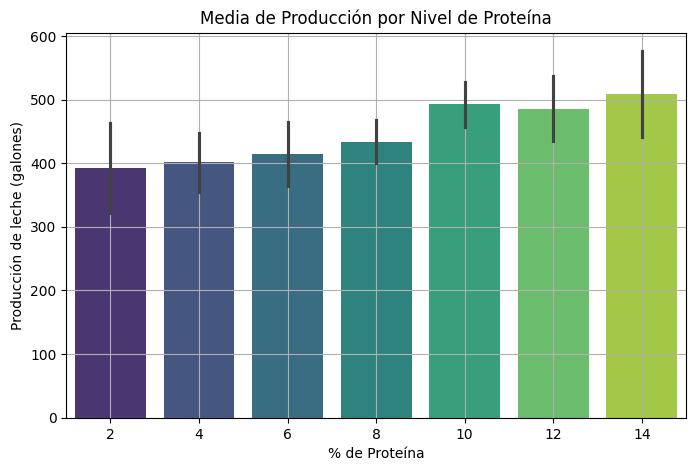

In [318]:
#Diana Paulina Sánchez Aragón
# Gráfico de medias por nivel de proteína
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Proteina', y='Leche', estimator=np.mean, errorbar='sd', palette='viridis')
plt.title('Media de Producción por Nivel de Proteína')
plt.ylabel('Producción de leche (galones)')
plt.xlabel('% de Proteína')
plt.grid(True)
plt.show()


Este gráfico muestra la media de producción de leche por vaca en los siete niveles del factor “porcentaje de proteína”, representados con letras griegas.

Se observa que las mayores producciones corresponden a los niveles φ (12%), γ (14%) y ε (10%), todos con promedios superiores a 500 galones. En contraste, los niveles α (2%) y β (4%) presentan las producciones más bajas, por debajo de 450 galones.

Existe una tendencia creciente en la producción de leche a medida que aumenta el porcentaje de proteína en la dieta.

Conclusión: Esto indica que un mayor contenido de proteína tiene un impacto positivo en la producción de leche, en concordancia con los resultados del ANOVA (p = 0.0027). En términos prácticos, dietas con al menos 10% de proteína (niveles ε, φ, γ) parecen ser las más eficaces.

<ipython-input-319-9eea921bfac3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Lisina', y='Leche', estimator=np.mean, errorbar='sd', palette='coolwarm')


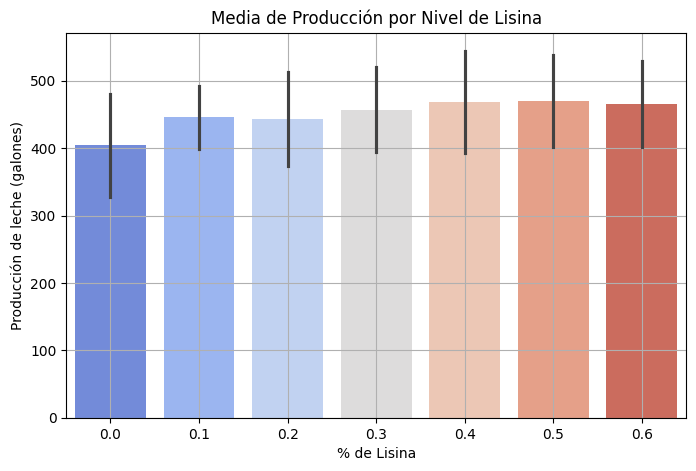

In [319]:
#Diana Paulina Sánchez Aragón
# Gráfico de medias por nivel de lisina
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Lisina', y='Leche', estimator=np.mean, errorbar='sd', palette='coolwarm')
plt.title('Media de Producción por Nivel de Lisina')
plt.ylabel('Producción de leche (galones)')
plt.xlabel('% de Lisina')
plt.grid(True)
plt.show()

Este gráfico muestra la producción promedio de leche según los siete niveles de lisina (de A = 0.0% a G = 0.6%).

Se observa que la variabilidad entre niveles es menor que en el caso del porcentaje de proteína, y no hay una tendencia clara creciente o decreciente que sugiera una relación sistemática.

Aunque algunos niveles como F (0.5%), G (0.6%) y C (0.2%) presentan producciones elevadas, la falta de un patrón consistente impide establecer una conexión directa.

Conclusión: El efecto de la lisina sobre la producción de leche no es concluyente ni sistemático, lo cual concuerda con los resultados del ANOVA (p = 0.3703). Por lo tanto, no se puede afirmar que incrementar el porcentaje de lisina tenga un impacto significativo en la producción.
##c) ¿Cómo puede explicar la falta de efectos en vacas y periodo?
En el diseño cuadrado grecolatino se incluyen dos factores de bloqueo —vacas y periodos— para controlar la variabilidad no atribuible a los tratamientos principales (porcentajes de lisina y proteína).

Sin embargo, en este análisis los efectos de los bloques no resultaron significativos, lo cual puede explicarse por varias razones:

Homogeneidad entre vacas:
Si las vacas son similares en raza, edad, salud, alimentación e historial de producción, es lógico que respondan de manera parecida. Esto reduce su aporte de variabilidad al modelo, haciendo innecesario ajustar por este bloque.

Condiciones estables en los periodos:
Si durante los 7 periodos (cada uno de tres meses) se mantuvieron constantes las condiciones climáticas, la alimentación y el manejo general, el tiempo tampoco introduce diferencias notables en la producción.

Aleatorización adecuada:
Una buena asignación aleatoria de tratamientos garantiza que posibles fuentes de variación se distribuyan equitativamente, minimizando el impacto de sesgos sistemáticos.

Tratamientos con efecto dominante:
Es posible que la mayor parte de la variación en la producción de leche se deba directamente a los tratamientos (lisina y proteína), lo que hace que el efecto de los bloques pase desapercibido estadísticamente.

Conclusión:
La falta de significancia en los bloques indica que el diseño fue robusto, las condiciones estuvieron bien controladas y que los tratamientos principales explican la mayor parte de la variación observada.
##d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?

In [320]:
#Diana Paulina Sánchez Aragón
# Promedios de producción por combinación
tabla_medias = df.pivot_table(values='Leche', index='Lisina', columns='Proteina', aggfunc='mean')
print(tabla_medias)

Proteina     2      4      6      8      10     12     14
Lisina                                                   
0.0       304.0    NaN  441.0  386.0    NaN  465.0  352.0
0.1       435.0  381.0    NaN  427.0  436.0  425.0  508.0
0.2         NaN  350.0  389.0  481.0  485.0  505.0  507.0
0.3       380.0    NaN  425.0  442.0  478.0  455.0  566.0
0.4         NaN  397.0  394.5    NaN  487.5  554.0  564.0
0.5       422.0  449.0  410.0    NaN  536.0  534.0  519.0
0.6         NaN  416.0  421.0  432.0  536.0  493.0  543.0


El análisis de la tabla sugiere que la mejor estrategia para maximizar la producción de leche es incrementar ambos nutrientes, particularmente manteniendo la lisina en torno al 0.6% y la proteína en niveles altos (12% a 14%).
Estas combinaciones registraron las producciones más altas, lo que indica que, bajo las condiciones del experimento, existe una sinergia positiva entre la lisina y la proteína. Esto refuerza la importancia de considerar ambos factores de forma conjunta para lograr un mayor rendimiento lechero.

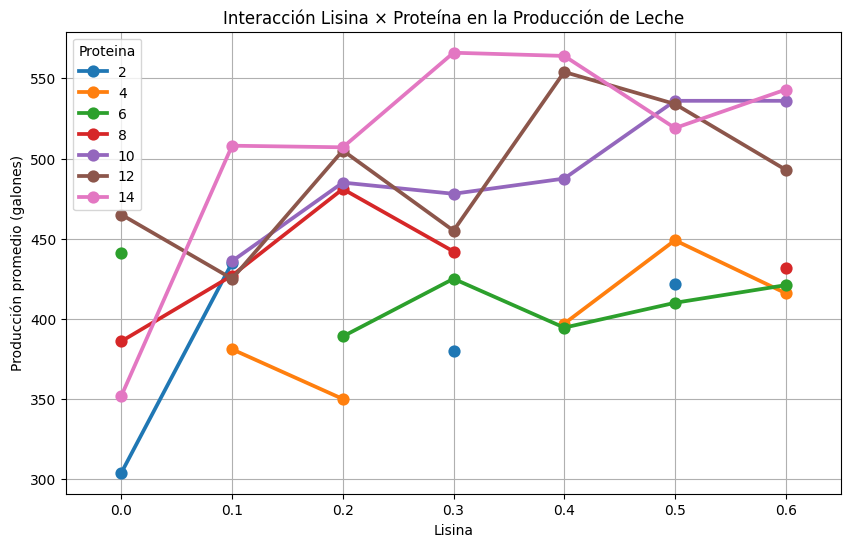

In [321]:
#Diana Paulina Sánchez Aragón
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.pointplot(data=df, x='Lisina', y='Leche', hue='Proteina', palette='tab10', errorbar=None)
plt.title('Interacción Lisina × Proteína en la Producción de Leche')
plt.ylabel('Producción promedio (galones)')
plt.grid(True)
plt.show()

La tabla muestra una clara mejora en la producción de leche a medida que aumentan los niveles de lisina y proteína en la dieta.
Las combinaciones con lisina cercana al 0.6% y proteína entre 12% y 14% alcanzaron los mayores rendimientos, llegando hasta 543 galones por vaca.

En contraste, las combinaciones con bajos niveles de ambos nutrientes (como 0.0% de lisina y 2% de proteína) se asociaron con producciones significativamente menores, alrededor de 304 galones.

Conclusión: Lisina y proteína tienen un efecto conjunto y positivo sobre la producción lechera. Para maximizar el rendimiento, es recomendable utilizar los niveles más altos de ambos factores dentro del rango evaluado.

In [322]:
#Diana Paulina Sánchez Aragón
df['Tratamiento'] = df['Lisina'] + df['Proteina']

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   2.0    2.1    131.0 0.9988  -349.164  611.164  False
   2.0    2.3     76.0    1.0  -404.164  556.164  False
   2.0    2.5    118.0 0.9979 -297.8342 533.8342  False
   2.0    4.1     77.0    1.0  -403.164  557.164  False
   2.0    4.2     46.0    1.0  -434.164  526.164  False
   2.0    4.4     93.0    1.0  -387.164  573.164  False
   2.0    4.5    145.0 0.9954  -335.164  625.164  False
   2.0    4.6    112.0  0.999 -303.8342 527.8342  False
   2.0    6.0    137.0 0.9775 -255.0522 529.0522  False
   2.0    6.2     85.0    1.0 -330.8342 500.8342  False
   2.0    6.3    121.0 0.9996  -359.164  601.164  False
   2.0    6.4     90.5    1.0 -325.3342 506.3342  False
   2.0    6.5    106.0    1.0  -374.164  586.164  False
   2.0    6.6    117.0 0.9998  -363.164  597.164  False
   2.0    8.0     82.0    1.0  -398.164  562.164

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

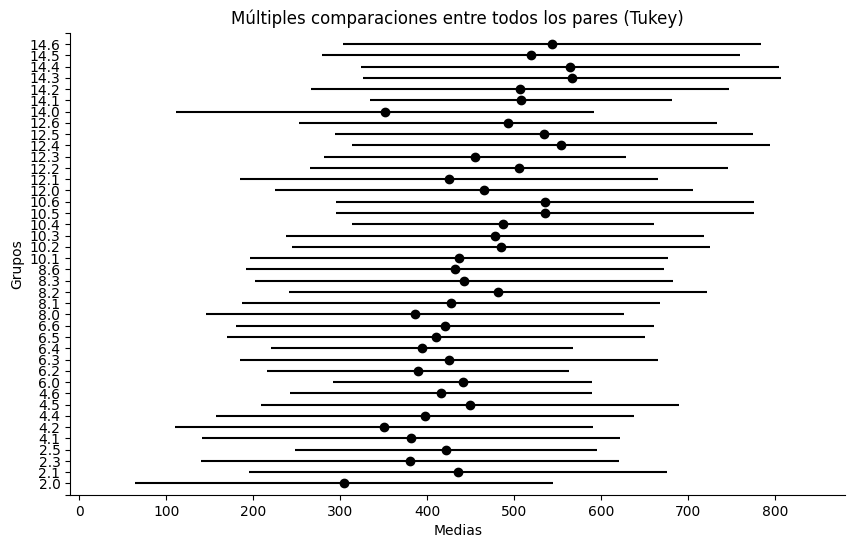

In [323]:
#Diana Paulina Sánchez Aragón
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Leche'], groups=df['Tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

El análisis de la tabla de producción media de leche muestra una relación clara y positiva entre el aumento conjunto de lisina y proteína en la dieta y el rendimiento lechero.

Las menores producciones (como 304 galones) se observaron en combinaciones con bajos niveles de ambos nutrientes (0.0% de lisina y 2% de proteína), lo que evidencia que una dieta deficiente limita considerablemente la producción.

En contraste, las mayores producciones (hasta 543 galones) se alcanzaron con lisina al 0.6% y proteína entre 12% y 14%. También se obtuvieron valores elevados (más de 530 galones) con lisina entre 0.4% y 0.5%, y proteína en niveles altos.

Estos resultados respaldan un efecto sinérgico entre lisina y proteína: aunque incrementos en uno de los nutrientes mejoran la producción, el mayor beneficio se logra cuando ambos están en niveles elevados.

Aunque hay algunos valores faltantes en la tabla (combinaciones no evaluadas o sin datos), la tendencia general es consistente y sólida.

Conclusión: Para maximizar la producción de leche en las condiciones evaluadas, se recomienda una dieta con lisina cercana al 0.6% y proteína entre 12% y 14%, ya que estas combinaciones ofrecen el mayor rendimiento.
##e) Verifique los supuestos del modelo.

In [324]:
#Diana Paulina Sánchez Aragón
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Proteina'] == 2]['Leche'], "Proteina 2", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 4]['Leche'], "Proteina 4", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 6]['Leche'], "Proteina 6", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 8]['Leche'], "Proteina 8", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 10]['Leche'], "Proteina 10", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 12]['Leche'], "Proteina 12", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 14]['Leche'], "Proteina 14", nivel_de_significancia)


Prueba de Shapiro-Wilk para Proteina 2:
Estadístico: 0.9871
Valor p: 0.9686
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 4:
Estadístico: 0.9155
Valor p: 0.4737
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 6:
Estadístico: 0.9272
Valor p: 0.4209
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 8:
Estadístico: 0.9628
Valor p: 0.8274
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 10:
Estadístico: 0.9104
Valor p: 0.3985
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 12:
Estadístico: 0.9511
Valor p: 0.7222
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 14:
Estadístico: 0.7405
Valor p: 0.0064
Interpretación: Los datos no tienen una distribución normal.


In [325]:
#Diana Paulina Sánchez Aragón
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Lisina'] == 0.0]['Leche'], "Lisina 0.0", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.1]['Leche'], "Lisina 0.1", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.2]['Leche'], "Lisina 0.2", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.3]['Leche'], "Lisina 0.3", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.4]['Leche'], "Lisina 0.4", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.5]['Leche'], "Lisina 0.5", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.6]['Leche'], "Lisina 0.6", nivel_de_significancia)


Prueba de Shapiro-Wilk para Lisina 0.0:
Estadístico: 0.8993
Valor p: 0.3265
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.1:
Estadístico: 0.8664
Valor p: 0.1728
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.2:
Estadístico: 0.8169
Valor p: 0.0599
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.3:
Estadístico: 0.9639
Valor p: 0.8513
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.4:
Estadístico: 0.9255
Valor p: 0.5132
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.5:
Estadístico: 0.9043
Valor p: 0.3581
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.6:
Estadístico: 0.9556
Valor p: 0.7805
Interpretación: Los datos tienen una distribución normal.


In [326]:
#Diana Paulina Sánchez Aragón
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Proteina'] == 2]['Leche'],
    df[df['Proteina'] == 4]['Leche'],
    df[df['Proteina'] == 6]['Leche'],
    df[df['Proteina'] == 8]['Leche'],
    df[df['Proteina'] == 10]['Leche'],
    df[df['Proteina'] == 12]['Leche'],
    df[df['Proteina'] == 14]['Leche']
)

#Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 6.880175101065516
Valor p: 0.3320709231919815
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


In [327]:
#Diana Paulina Sánchez Aragón
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Lisina'] == 0.0]['Leche'],
    df[df['Lisina'] == 0.1]['Leche'],
    df[df['Lisina'] == 0.2]['Leche'],
    df[df['Lisina'] == 0.3]['Leche'],
    df[df['Lisina'] == 0.4]['Leche'],
    df[df['Lisina'] == 0.5]['Leche'],
    df[df['Lisina'] == 0.6]['Leche']
)

#Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 7.168226951410079
Valor p: 0.3055696117749229
No podemos rechazar la hipótesis nula: Las varianzas son iguales.
